# Injuries Analysis

![Banner](https://raw.githubusercontent.com/seu-usuario/football_analysis/main/imgs/injuries.png)

### Primary Analysis

In [6]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [7]:
from src.data_loader import load_csv


player_profiles = load_csv("player_profiles.csv")
market_values = load_csv("player_market_value.csv")
player_performances = load_csv("player_performances.csv")
player_injuries = load_csv("player_injuries.csv")

✔️ Data files already available.
✔️ Data files already available.
✔️ Data files already available.
✔️ Data files already available.


In [8]:
print("Shape:", player_injuries.shape)
print("\nColumns:", player_injuries.columns.tolist())

Shape: (143195, 7)

Columns: ['player_id', 'season_name', 'injury_reason', 'from_date', 'end_date', 'days_missed', 'games_missed']


In [9]:
player_injuries.head(10)

,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed
0,10,15/16,Hand injury,2016-04-19,2016-04-29,11.0,2
1,10,15/16,Thigh problems,2015-12-18,2015-12-31,14.0,1
2,10,15/16,Capsular injury,2015-11-11,2015-11-21,11.0,0
3,10,15/16,Rest,2015-11-04,2015-11-06,3.0,1
4,10,15/16,Hamstring injury,2015-08-20,2015-10-08,50.0,10
5,10,14/15,Lumbago,2014-12-02,2014-12-04,3.0,1
6,10,13/14,muscular problems,2014-04-06,2014-05-03,28.0,4
7,10,13/14,Back problems,2014-03-23,2014-03-29,7.0,2
8,10,13/14,Pelvic injury,2014-02-27,2014-03-05,7.0,3
9,10,13/14,cold,2014-01-27,2014-02-01,6.0,1


In [10]:
player_injuries.dtypes

player_id          int64
season_name       object
injury_reason     object
from_date         object
end_date          object
days_missed      float64
games_missed       int64
dtype: object

In [11]:
player_injuries.describe()

,player_id,days_missed,games_missed
count,1.431950e+05,143173.000000,143195.000000
mean,2.531593e+05,51.719291,6.628479
std,2.318766e+05,104.437179,9.468380
min,2.000000e+00,1.000000,0.000000
25%,6.168200e+04,10.000000,1.000000
50%,1.888540e+05,22.000000,3.000000
75%,3.817940e+05,53.000000,7.000000
max,1.396965e+06,8655.000000,208.000000


In [12]:
# Data type conversion for dates
print("📅 DATA TYPE CONVERSION - DATES")
print("=" * 40)

print("Current data types:")
print(player_injuries.dtypes)

# Convert date columns to datetime
player_injuries['from_date'] = pd.to_datetime(player_injuries['from_date'], errors='coerce')
player_injuries['end_date'] = pd.to_datetime(player_injuries['end_date'], errors='coerce')

print("\nData types after conversion:")
print(player_injuries[['from_date', 'end_date']].dtypes)

# Check how many conversions failed
original_from_missing = 22
original_end_missing = 1523

failed_from_date = player_injuries['from_date'].isna().sum() - original_from_missing
failed_end_date = player_injuries['end_date'].isna().sum() - original_end_missing

print(f"\nFailed conversions:")
print(f"from_date: {failed_from_date} new failures")
print(f"end_date: {failed_end_date} new failures")

# Remove rows where from_date is invalid (after conversion)
initial_count = len(player_injuries)
player_injuries = player_injuries[player_injuries['from_date'].notna()]
print(f"\nRows removed (invalid from_date): {initial_count - len(player_injuries)}")

print(f"\nFinal dataset: {len(player_injuries):,} valid injuries")

# Check temporal range of the data
print(f"\nTime period covered by injuries:")
print(f"Earliest date: {player_injuries['from_date'].min()}")
print(f"Latest date: {player_injuries['from_date'].max()}")

📅 DATA TYPE CONVERSION - DATES
Current data types:
player_id          int64
season_name       object
injury_reason     object
from_date         object
end_date          object
days_missed      float64
games_missed       int64
dtype: object

Data types after conversion:
from_date    datetime64[ns]
end_date     datetime64[ns]
dtype: object

Failed conversions:
from_date: 0 new failures
end_date: 0 new failures

Rows removed (invalid from_date): 22

Final dataset: 143,173 valid injuries

Time period covered by injuries:
Earliest date: 1973-09-02 00:00:00
Latest date: 2025-12-22 00:00:00


In [13]:
# Filter out future injuries
print("🗓️ FILTERING OUT FUTURE INJURIES")
print("=" * 35)

cutoff_date = pd.Timestamp('2025-11-01')
print(f"Cutoff date: {cutoff_date}")

# Count before filtering
initial_count = len(player_injuries)
print(f"Initial number of injuries: {initial_count:,}")

# Identify future injuries
future_injuries = player_injuries[player_injuries['from_date'] > cutoff_date]
print(f"Injuries after {cutoff_date}: {len(future_injuries):,}")

# Filter the dataset
player_injuries_clean = player_injuries[player_injuries['from_date'] <= cutoff_date].copy()

# Count after filtering
final_count = len(player_injuries_clean)
print(f"Final number of injuries: {final_count:,}")
print(f"Records removed: {initial_count - final_count:,}")

# Check the new date range
print(f"\n📅 NEW DATE RANGE:")
print(f"Earliest injury: {player_injuries_clean['from_date'].min()}")
print(f"Latest injury: {player_injuries_clean['from_date'].max()}")

# Update missing values analysis for the cleaned dataset
print(f"\n🔍 UPDATED MISSING VALUES ANALYSIS:")
missing_after_clean = player_injuries_clean.isnull().sum()
print(missing_after_clean[['end_date', 'days_missed']])

print(f"\nMissing end_date after cleaning: {missing_after_clean['end_date']:,}")
print(f"Percentage: {(missing_after_clean['end_date']/len(player_injuries_clean))*100:.2f}%")

🗓️ FILTERING OUT FUTURE INJURIES
Cutoff date: 2025-11-01 00:00:00
Initial number of injuries: 143,173
Injuries after 2025-11-01 00:00:00: 1
Final number of injuries: 143,172
Records removed: 1

📅 NEW DATE RANGE:
Earliest injury: 1973-09-02 00:00:00
Latest injury: 2025-10-20 00:00:00

🔍 UPDATED MISSING VALUES ANALYSIS:
end_date       1522
days_missed       0
dtype: int64

Missing end_date after cleaning: 1,522
Percentage: 1.06%


In [14]:
null_count = player_injuries.isnull().sum()
null_count

player_id           0
season_name         0
injury_reason       0
from_date           0
end_date         1523
days_missed         0
games_missed        0
dtype: int64

In [15]:
# Analysis of end_date missing cases
missing_analysis = player_injuries[player_injuries['end_date'].isnull()].copy()

print("🔍 DETAILED ANALYSIS OF END_DATE MISSING CASES:")
print(f"Total: {len(missing_analysis)} cases")
print(f"Have days_missed: {missing_analysis['days_missed'].notna().sum()} cases")
print(f"Average days_missed when available: {missing_analysis['days_missed'].mean():.1f} days")

# Check if they are recent injuries (without end date because they are still active)
missing_analysis['from_date_year'] = missing_analysis['from_date'].dt.year
print("\nDistribution by start year:")
print(missing_analysis['from_date_year'].value_counts().sort_index())

🔍 DETAILED ANALYSIS OF END_DATE MISSING CASES:
Total: 1523 cases
Have days_missed: 1523 cases
Average days_missed when available: 295.8 days

Distribution by start year:
from_date_year
2002       1
2010       1
2011       2
2012       1
2013       1
2014       3
2015       6
2016       6
2017       5
2018      13
2019       9
2020      11
2021      19
2022      28
2023      63
2024     199
2025    1155
Name: count, dtype: int64


In [16]:
# Check the complete distribution of all injuries by year
print("📊 COMPLETE DISTRIBUTION OF ALL INJURIES BY YEAR:")
player_injuries_clean['from_date_year'] = player_injuries_clean['from_date'].dt.year
yearly_distribution = player_injuries_clean['from_date_year'].value_counts().sort_index()
yearly_distribution

📊 COMPLETE DISTRIBUTION OF ALL INJURIES BY YEAR:


from_date_year
1973        1
1974        4
1976        2
1980        1
1981        2
1982        2
1984        3
1990        8
1991        2
1992        7
1993       13
1994       24
1995       41
1996       51
1997       77
1998      117
1999      153
2000      183
2001      232
2002      257
2003      263
2004      303
2005      361
2006      344
2007      817
2008     1942
2009     1879
2010     1923
2011     2722
2012     3103
2013     3867
2014     4123
2015     5405
2016     6822
2017     8432
2018     9391
2019    11252
2020    10933
2021    15164
2022    14164
2023    14789
2024    14778
2025     9215
Name: count, dtype: int64

In [17]:
# Basic Statistics
print(f"Total injury records: {len(player_injuries):,}")
print(f"Average days missed: {player_injuries['days_missed'].mean():.1f} days")
print(f"Average games missed: {player_injuries['games_missed'].mean():.1f} games")

Total injury records: 143,173
Average days missed: 51.7 days
Average games missed: 6.6 games


### Deep Analysis

📈 TEMPORAL ANALYSIS OF INJURIES


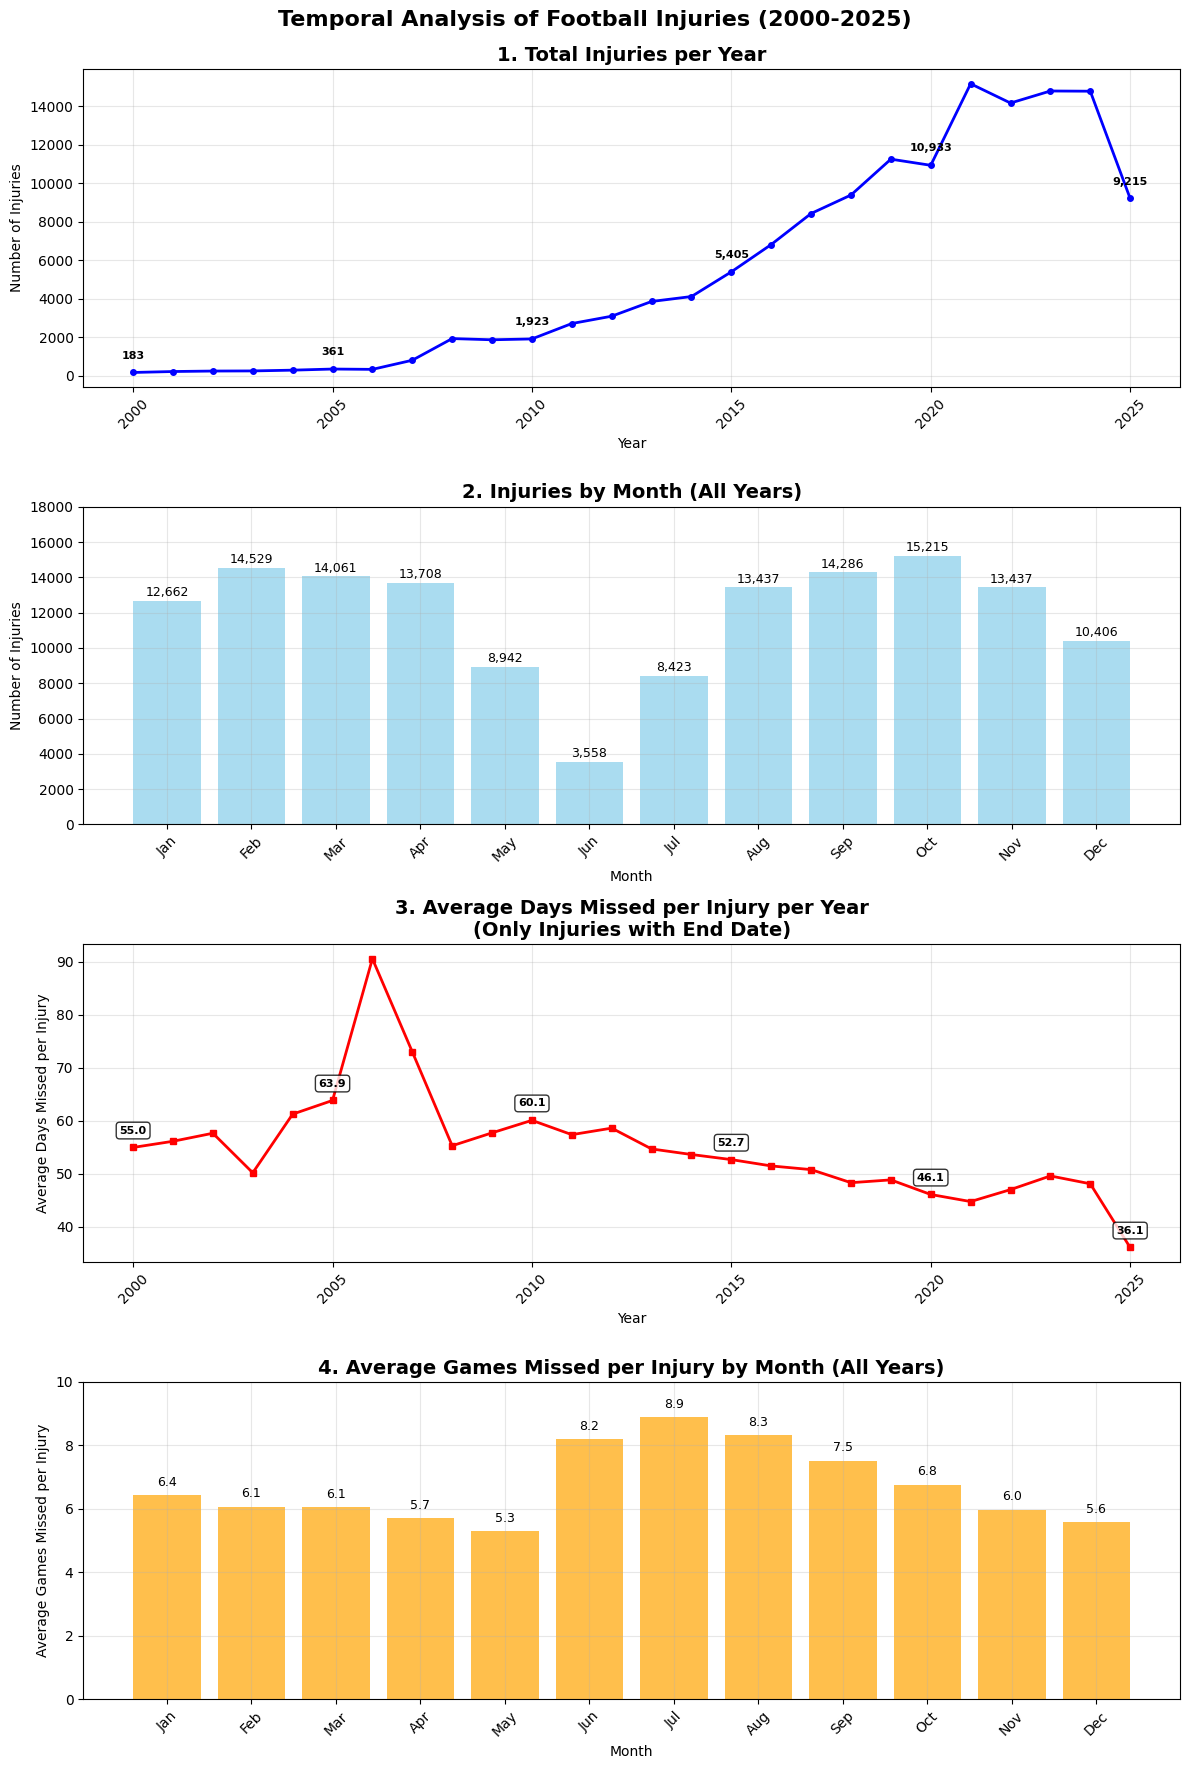


📊 SUMMARY STATISTICS (2000-2025):
Total injuries analyzed: 142,664
Years with end_date available: 26
Peak injury year: 2021 (15,164 injuries)
Peak injury month: Oct (15,215 injuries)
Peak average games missed month: Jul (8.9 avg games)
Highest average days missed: 2006 (90.6 days avg)


In [18]:
# Temporal Analysis of Injuries (with Games Missed by Month)
print("📈 TEMPORAL ANALYSIS OF INJURIES")
print("=" * 35)

# Filter data from year 2000 onwards
injuries_from_2000 = player_injuries_clean[player_injuries_clean['from_date'].dt.year >= 2000].copy()

# Create subplots - 4 rows, 1 column
fig, axes = plt.subplots(4, 1, figsize=(12, 18))
fig.suptitle('Temporal Analysis of Football Injuries (2000-2025)', fontsize=16, fontweight='bold')

# 1. Total Injuries per Year
yearly_injuries = injuries_from_2000.groupby(injuries_from_2000['from_date'].dt.year).size()
axes[0].plot(yearly_injuries.index, yearly_injuries.values, marker='o', linewidth=2, markersize=4, color='blue')
axes[0].set_title('\n1. Total Injuries per Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Injuries')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Add data labels for yearly injuries (every 5 years)
for year, count in yearly_injuries.items():
    if year % 5 == 0:
        axes[0].annotate(f'{count:,}', (year, count), 
                        textcoords="offset points", xytext=(0,10), 
                        ha='center', fontsize=8, fontweight='bold')

# 2. Total Injuries by Month (ignoring year)
monthly_injuries = injuries_from_2000.groupby(injuries_from_2000['from_date'].dt.month).size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bars1 = axes[1].bar(monthly_injuries.index, monthly_injuries.values, color='skyblue', alpha=0.7)
axes[1].set_title('2. Injuries by Month (All Years)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Injuries')
axes[1].set_ylim(0, 18000)  
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names, rotation=45)
axes[1].grid(True, alpha=0.3)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 100,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 3. Average Days Missed per Injury per Year (only with end_date)
injuries_with_end_date = injuries_from_2000[injuries_from_2000['end_date'].notnull()]
yearly_avg_days_missed = injuries_with_end_date.groupby(
    injuries_with_end_date['from_date'].dt.year
)['days_missed'].mean()

axes[2].plot(yearly_avg_days_missed.index, yearly_avg_days_missed.values, 
             marker='s', color='red', linewidth=2, markersize=4)
axes[2].set_title('3. Average Days Missed per Injury per Year\n(Only Injuries with End Date)', 
                 fontsize=14, fontweight='bold')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Days Missed per Injury')
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

# Add data labels for average days missed (every 5 years)
for year, avg_days in yearly_avg_days_missed.items():
    if year % 5 == 0:
        axes[2].annotate(f'{avg_days:.1f}', (year, avg_days), 
                        textcoords="offset points", xytext=(0,10), 
                        ha='center', fontsize=8, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 4. Average Games Missed per Injury by Month (ignoring year)
monthly_avg_games_missed = injuries_from_2000.groupby(injuries_from_2000['from_date'].dt.month)['games_missed'].mean()
bars2 = axes[3].bar(monthly_avg_games_missed.index, monthly_avg_games_missed.values, color='orange', alpha=0.7)
axes[3].set_title('4. Average Games Missed per Injury by Month (All Years)', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Month')
axes[3].set_ylabel('Average Games Missed per Injury')
axes[3].set_xticks(range(1, 13))
axes[3].set_xticklabels(month_names, rotation=45)
axes[3].set_ylim(0, 10)  
axes[3].grid(True, alpha=0.3)

# Add value labels on top of bars
for bar in bars2:
    height = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\n📊 SUMMARY STATISTICS (2000-2025):")
print(f"Total injuries analyzed: {len(injuries_from_2000):,}")
print(f"Years with end_date available: {len(yearly_avg_days_missed)}")
print(f"Peak injury year: {yearly_injuries.idxmax()} ({yearly_injuries.max():,} injuries)")
print(f"Peak injury month: {month_names[monthly_injuries.idxmax() - 1]} ({monthly_injuries.max():,} injuries)")
print(f"Peak average games missed month: {month_names[monthly_avg_games_missed.idxmax() - 1]} ({monthly_avg_games_missed.max():.1f} avg games)")
print(f"Highest average days missed: {yearly_avg_days_missed.idxmax()} ({yearly_avg_days_missed.max():.1f} days avg)")

📊 YEARLY INJURY EVOLUTION ANALYSIS (2015-2025)


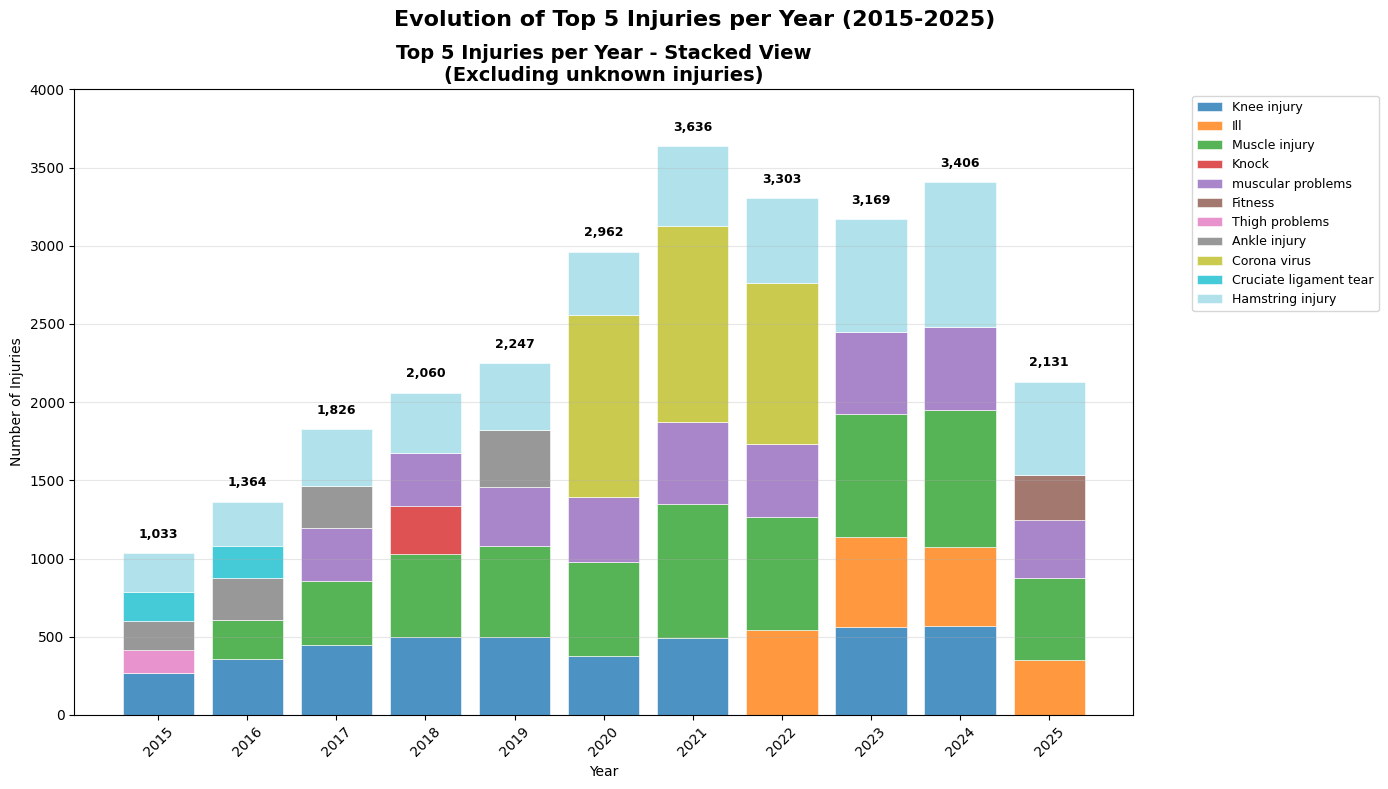


📊 YEARLY BREAKDOWN - TOP 5 INJURIES PER YEAR


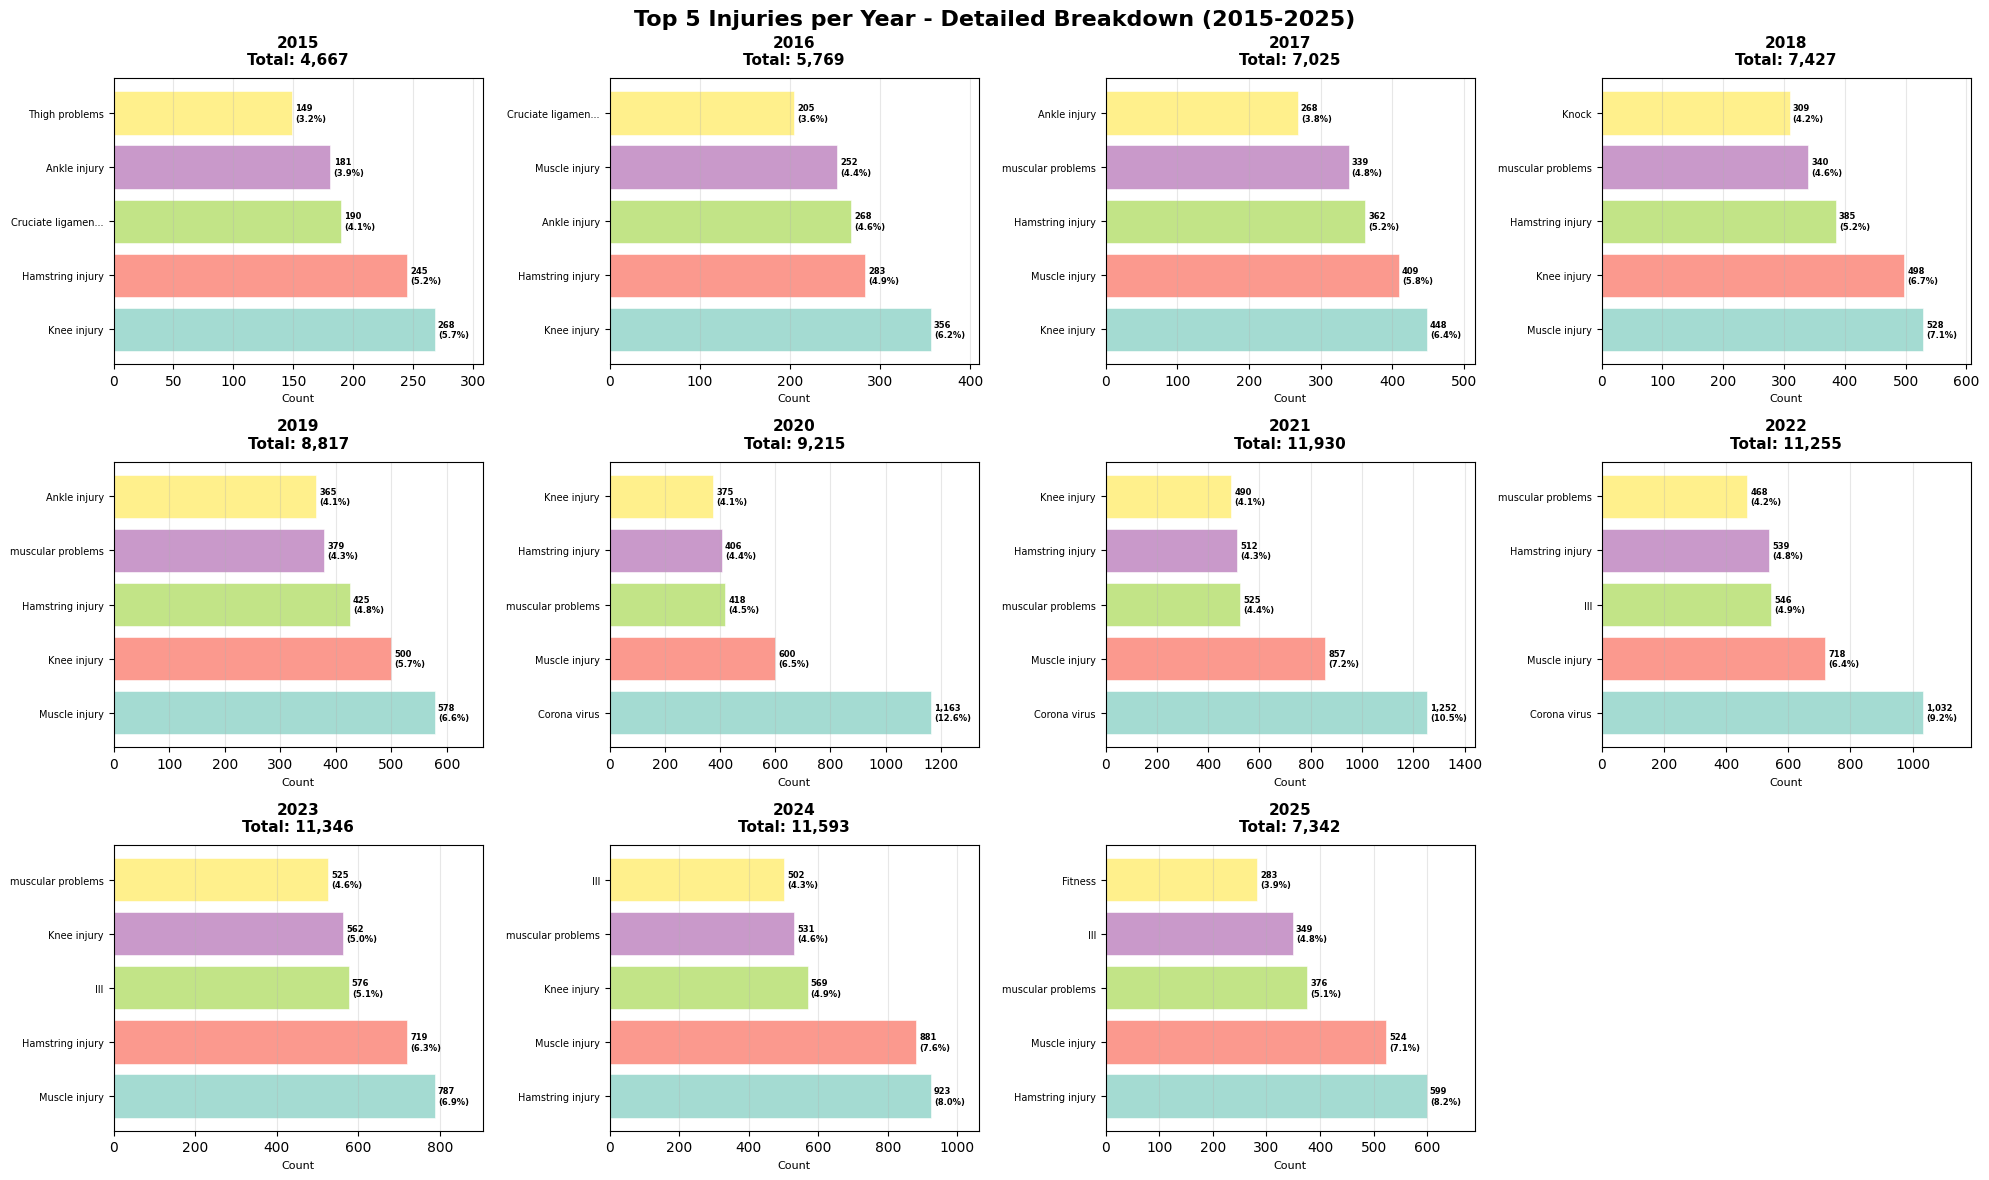


📈 SUMMARY STATISTICS (2015-2025):
Total injuries (2015-2025): 96,386
Average injuries per year: 8762

🏆 MOST FREQUENT INJURIES OVERALL (2015-2025):
 1. Muscle injury              6,244 ( 6.5%) |  34.7 avg days
 2. Hamstring injury           5,398 ( 5.6%) |  44.4 avg days
 3. Knee injury                4,792 ( 5.0%) |  90.6 avg days
 4. muscular problems          4,222 ( 4.4%) |  21.2 avg days
 5. Ankle injury               3,557 ( 3.7%) |  51.5 avg days
 6. Corona virus               3,468 ( 3.6%) |  14.7 avg days
 7. Ill                        3,404 ( 3.5%) |  10.5 avg days
 8. Cruciate ligament tear     3,017 ( 3.1%) | 248.4 avg days
 9. Knock                      2,848 ( 3.0%) |  27.4 avg days
10. Fitness                    2,530 ( 2.6%) |  28.1 avg days


In [19]:
# Yearly Injury Evolution Analysis 
print("📊 YEARLY INJURY EVOLUTION ANALYSIS (2015-2025)")
print("=" * 45)

# First, create injuries_filtered by excluding unknown injuries
injuries_filtered = player_injuries_clean[player_injuries_clean['injury_reason'] != 'unknown injury']

# Create single plot for the stacked bar chart
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Evolution of Top 5 Injuries per Year (2015-2025)', fontsize=16, fontweight='bold')

# Prepare data for stacked bar chart
last_10_years = injuries_filtered[injuries_filtered['from_date'].dt.year.between(2015, 2025)]
years_range = range(2015, 2026)
injury_counts_by_year = {}

for year in years_range:
    year_data = last_10_years[last_10_years['from_date'].dt.year == year]
    top_5_year = year_data['injury_reason'].value_counts().head(5)
    injury_counts_by_year[year] = top_5_year

# Create stacked bar chart
bottom = np.zeros(len(years_range))
unique_injuries = set()

# Collect all unique injuries that appear in top 5 any year
for year, top_injuries in injury_counts_by_year.items():
    unique_injuries.update(top_injuries.index)

# Use better color scheme
injury_colors = plt.cm.tab20(np.linspace(0, 1, len(unique_injuries)))
injury_colors_dict = {injury: injury_colors[i] for i, injury in enumerate(unique_injuries)}

# Plot stacked bars
for injury in unique_injuries:
    counts = []
    for year in years_range:
        if injury in injury_counts_by_year[year]:
            counts.append(injury_counts_by_year[year][injury])
        else:
            counts.append(0)
    
    if sum(counts) > 0:
        ax.bar(years_range, counts, bottom=bottom, color=injury_colors_dict[injury], 
               alpha=0.8, label=injury, edgecolor='white', linewidth=0.5)
        bottom += counts

# Add value labels on top of bars
for i, year in enumerate(years_range):
    total_injuries = sum(injury_counts_by_year[year].values)
    ax.text(year, total_injuries + 80, f'{total_injuries:,}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_title('Top 5 Injuries per Year - Stacked View\n(Excluding unknown injuries)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Injuries')
ax.set_ylim(0, 4000)
ax.set_xticks(list(years_range))
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

# LEGEND VERTICAL - uma embaixo da outra
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=1)

plt.tight_layout()
plt.show()

# AGORA CRIAR OS MINI-GRÁFICOS SEPARADAMENTE
print(f"\n📊 YEARLY BREAKDOWN - TOP 5 INJURIES PER YEAR")
print("=" * 60)

# Create separate figure for the small charts - CORREÇÃO: 3x4 grid para 11 anos
fig2, axes2 = plt.subplots(3, 4, figsize=(20, 12))  # 3 linhas, 4 colunas = 12 posições
fig2.suptitle('Top 5 Injuries per Year - Detailed Breakdown (2015-2025)', fontsize=16, fontweight='bold')

# Flatten the axes array for easy iteration
axes2 = axes2.flatten()

for idx, year in enumerate(years_range):
    ax = axes2[idx]
    
    year_data = last_10_years[last_10_years['from_date'].dt.year == year]
    top_5_year = year_data['injury_reason'].value_counts().head(5)
    total_injuries = len(year_data)
    
    # Prepare data for the bar chart
    injuries = list(top_5_year.index)
    counts = list(top_5_year.values)
    percentages = [(count / total_injuries) * 100 for count in counts]
    
    # Create horizontal bar chart
    bars = ax.barh(range(len(injuries)), counts, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(injuries))), 
                   alpha=0.8, edgecolor='white', linewidth=0.5)
    
    # Customize the chart
    ax.set_title(f'{year}\nTotal: {total_injuries:,}', fontsize=11, fontweight='bold', pad=10)
    ax.set_yticks(range(len(injuries)))
    
    # Shorten long injury names for better display
    shortened_labels = []
    for injury in injuries:
        if len(injury) > 18:
            shortened_labels.append(injury[:16] + '...')
        else:
            shortened_labels.append(injury)
    
    ax.set_yticklabels(shortened_labels, fontsize=7)
    ax.set_xlabel('Count', fontsize=8)
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_xlim(0, max(counts) * 1.15)
    
    # Add value and percentage labels on bars
    for i, (bar, count, percentage) in enumerate(zip(bars, counts, percentages)):
        width = bar.get_width()
        ax.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2., 
                f'{count:,}\n({percentage:.1f}%)', 
                ha='left', va='center', fontsize=6, fontweight='bold')

# Remove any unused subplots (a 12ª posição)
if len(years_range) < len(axes2):
    for idx in range(len(years_range), len(axes2)):
        fig2.delaxes(axes2[idx])

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📈 SUMMARY STATISTICS (2015-2025):")
print("=" * 40)
total_injuries_10_years = len(last_10_years)
print(f"Total injuries (2015-2025): {total_injuries_10_years:,}")
print(f"Average injuries per year: {total_injuries_10_years/len(years_range):.0f}")

# Most frequent injuries overall in the period
print(f"\n🏆 MOST FREQUENT INJURIES OVERALL (2015-2025):")
top_10_overall = last_10_years['injury_reason'].value_counts().head(10)
for i, (injury, count) in enumerate(top_10_overall.items(), 1):
    percentage = (count / total_injuries_10_years) * 100
    avg_days = last_10_years[last_10_years['injury_reason'] == injury]['days_missed'].mean()
    print(f"{i:2d}. {injury:<25} {count:>6,} ({percentage:>4.1f}%) | {avg_days:>5.1f} avg days")

🩺 ANALYSIS OF INJURY TYPES


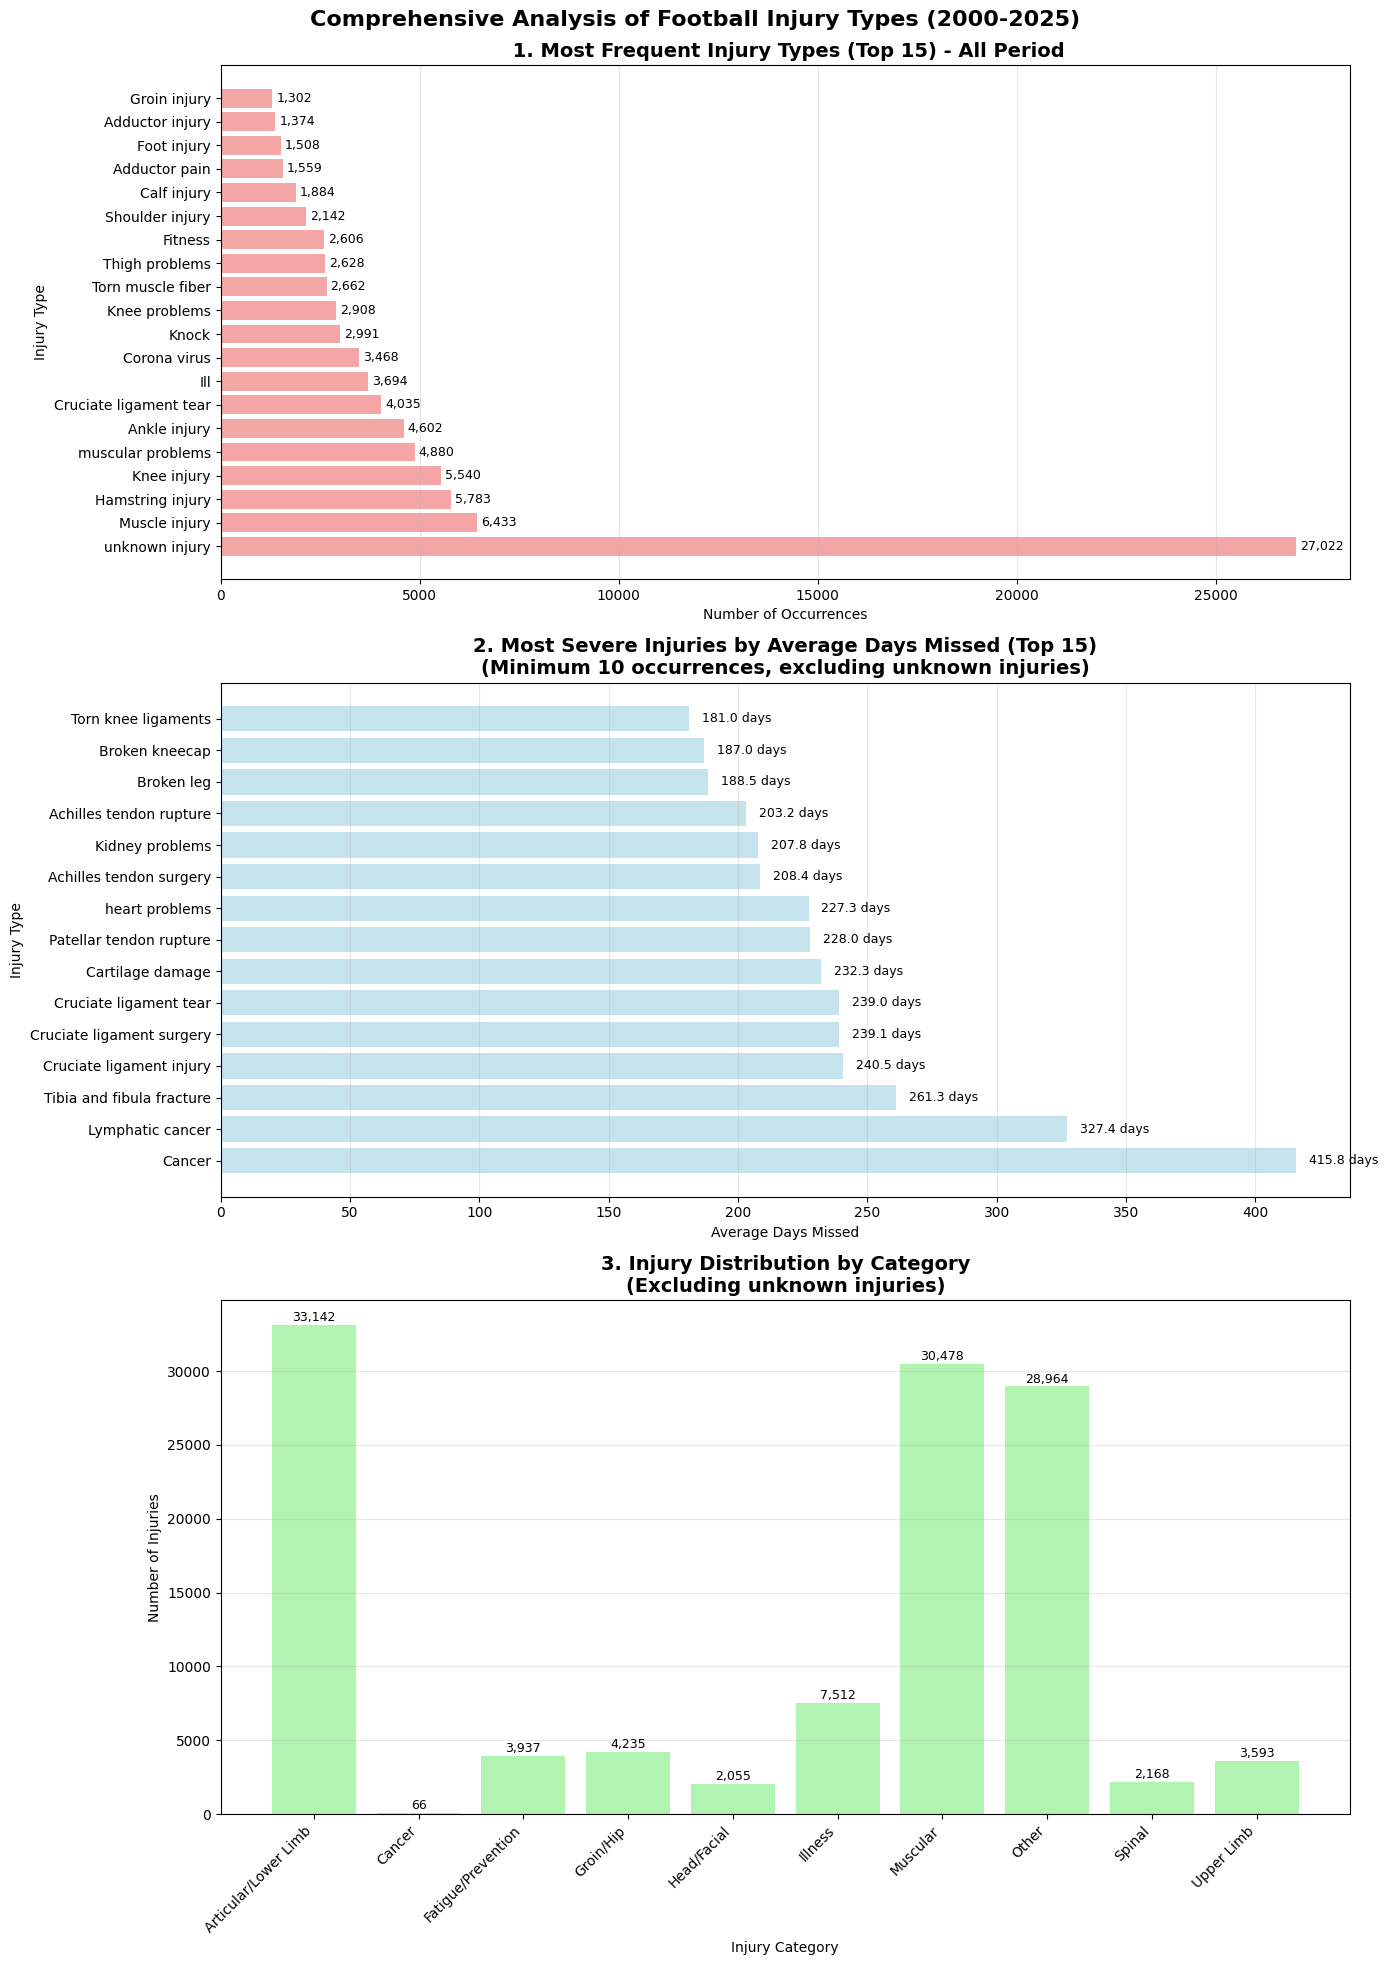


🏆 TOP 5 MOST FREQUENT INJURIES (2000-2025):
1. Muscle injury                   6,433 occurrences |  34.7 avg days |  5.1 avg games
2. Hamstring injury                5,783 occurrences |  44.2 avg days |  6.8 avg games
3. Knee injury                     5,540 occurrences |  90.3 avg days | 10.9 avg games
4. muscular problems               4,880 occurrences |  21.7 avg days |  3.1 avg games
5. Ankle injury                    4,602 occurrences |  50.9 avg days |  7.1 avg games

🩺 CANCER CASES DETAILS:
Total cancer cases: 66
Specific cancer types: {'Cancer': 30, 'Testicular cancer': 21, 'Lymphatic cancer': 10, 'Pelvic tumor': 2, 'Kidney tumor': 2, 'Liver tumor': 1}


In [20]:
# Analysis of Injury Types (with adjusted timeframe)
print("🩺 ANALYSIS OF INJURY TYPES")
print("=" * 30)

# Create subplots - 3 rows, 1 column
fig, axes = plt.subplots(3, 1, figsize=(14, 20))
fig.suptitle('Comprehensive Analysis of Football Injury Types (2000-2025)', fontsize=16, fontweight='bold')

# 1. Most Frequent Injuries (Top 15) - Keep unknown for context
top_15_injuries = player_injuries_clean['injury_reason'].value_counts().head(20)
bars1 = axes[0].barh(range(len(top_15_injuries)), top_15_injuries.values, color='lightcoral', alpha=0.7)
axes[0].set_title('\n 1. Most Frequent Injury Types (Top 15) - All Period', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Occurrences')
axes[0].set_ylabel('Injury Type')
axes[0].set_yticks(range(len(top_15_injuries)))
axes[0].set_yticklabels(top_15_injuries.index)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width + 100, bar.get_y() + bar.get_height()/2., 
                f'{int(width):,}', ha='left', va='center', fontsize=9)

# 2. Most Severe Injuries by Average Days Missed (Top 15)
# Filter injuries with at least 10 occurrences and exclude unknown injuries
injury_stats = player_injuries_clean[player_injuries_clean['injury_reason'] != 'unknown injury'].groupby('injury_reason').agg({
    'days_missed': ['count', 'mean'],
    'games_missed': 'mean'
}).round(1)
injury_stats.columns = ['count', 'avg_days_missed', 'avg_games_missed']
injury_stats = injury_stats[injury_stats['count'] >= 10]  # Minimum 10 occurrences

top_15_severe_days = injury_stats.nlargest(15, 'avg_days_missed')
bars2 = axes[1].barh(range(len(top_15_severe_days)), top_15_severe_days['avg_days_missed'], color='lightblue', alpha=0.7)
axes[1].set_title('2. Most Severe Injuries by Average Days Missed (Top 15)\n(Minimum 10 occurrences, excluding unknown injuries)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Days Missed')
axes[1].set_ylabel('Injury Type')
axes[1].set_yticks(range(len(top_15_severe_days)))
axes[1].set_yticklabels(top_15_severe_days.index)
axes[1].grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, bar in enumerate(bars2):
    width = bar.get_width()
    axes[1].text(width + 5, bar.get_y() + bar.get_height()/2., 
                f'{width:.1f} days', ha='left', va='center', fontsize=9)

# 3. Injury Categorization Analysis (with Cancer category and excluding unknown injuries)
def categorize_injury(reason):
    reason = str(reason).lower()
    if any(word in reason for word in ['cancer', 'tumor', 'leukemia', 'lymphoma']):
        return 'Cancer'
    elif any(word in reason for word in ['muscle', 'thigh', 'hamstring', 'adductor', 'calf', 'quadriceps']):
        return 'Muscular'
    elif any(word in reason for word in ['knee', 'ankle', 'foot', 'heel', 'achilles', 'ligament', 'cartilage']):
        return 'Articular/Lower Limb'
    elif any(word in reason for word in ['cold', 'flu', 'fever', 'virus', 'illness', 'infection']):
        return 'Illness'
    elif any(word in reason for word in ['training', 'fatigue', 'rest', 'fitness']):
        return 'Fatigue/Prevention'
    elif any(word in reason for word in ['back', 'spine', 'lumbar', 'disc']):
        return 'Spinal'
    elif any(word in reason for word in ['head', 'concussion', 'face', 'facial', 'nose']):
        return 'Head/Facial'
    elif any(word in reason for word in ['groin', 'pelvic', 'hip']):
        return 'Groin/Hip'
    elif any(word in reason for word in ['shoulder', 'arm', 'hand', 'wrist', 'elbow']):
        return 'Upper Limb'
    else:
        return 'Other'

# Apply categorization excluding unknown injuries
injuries_filtered = player_injuries_clean[player_injuries_clean['injury_reason'] != 'unknown injury']
injuries_filtered['injury_category'] = injuries_filtered['injury_reason'].apply(categorize_injury)

category_stats = injuries_filtered.groupby('injury_category').agg({
    'days_missed': ['count', 'mean'],
    'games_missed': 'mean'
}).round(1)
category_stats.columns = ['count', 'avg_days_missed', 'avg_games_missed']

bars3 = axes[2].bar(range(len(category_stats)), category_stats['count'], color='lightgreen', alpha=0.7)
axes[2].set_title('3. Injury Distribution by Category\n(Excluding unknown injuries)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Injury Category')
axes[2].set_ylabel('Number of Injuries')
axes[2].set_xticks(range(len(category_stats)))
axes[2].set_xticklabels(category_stats.index, rotation=45, ha='right')
axes[2].grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar in bars3:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Show top 5 most frequent injuries of entire period (2000-2025)
print(f"\n🏆 TOP 5 MOST FREQUENT INJURIES (2000-2025):")
top_5_all_time = injuries_filtered['injury_reason'].value_counts().head(5)
for i, (injury, count) in enumerate(top_5_all_time.items(), 1):
    avg_days = injuries_filtered[injuries_filtered['injury_reason'] == injury]['days_missed'].mean()
    avg_games = injuries_filtered[injuries_filtered['injury_reason'] == injury]['games_missed'].mean()
    print(f"{i}. {injury:<30} {count:>6,} occurrences | {avg_days:>5.1f} avg days | {avg_games:>4.1f} avg games")

# Show cancer cases specifically if any
cancer_cases = injuries_filtered[injuries_filtered['injury_category'] == 'Cancer']
if len(cancer_cases) > 0:
    print(f"\n🩺 CANCER CASES DETAILS:")
    print(f"Total cancer cases: {len(cancer_cases)}")
    print(f"Specific cancer types: {cancer_cases['injury_reason'].value_counts().to_dict()}")

⚽ INJURIES BY PLAYER POSITION ANALYSIS (2000-2025)
Total injuries from 2000 onwards: 142,664


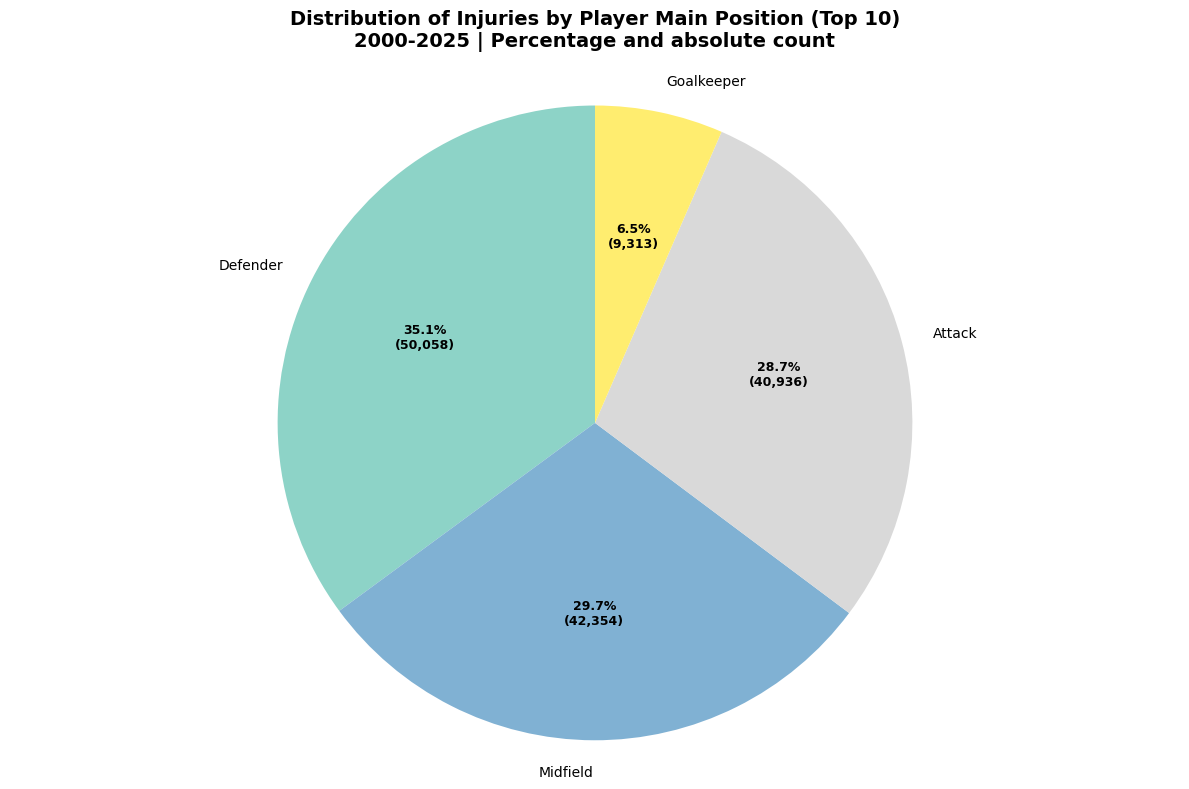


📋 MAIN POSITION DISTRIBUTION SUMMARY (Top 10 - 2000-2025):
 1. Defender                  50,059 injuries ( 35.1%)
 2. Midfield                  42,354 injuries ( 29.7%)
 3. Attack                    40,937 injuries ( 28.7%)
 4. Goalkeeper                 9,314 injuries (  6.5%)

📊 POSITION DATA QUALITY (2000-2025):
Missing main_position data: 0
Unique main_positions: 4
Total injuries with position data: 142,664
Unique players with position data: 34,399
Date range: 2000-2025


In [21]:
# Injuries by Player Position Analysis (2000 onwards)
print("⚽ INJURIES BY PLAYER POSITION ANALYSIS (2000-2025)")
print("=" * 50)

# Merge injuries with player profiles to get position data
injuries_with_profile = pd.merge(
    player_injuries_clean,
    player_profiles[['player_id', 'main_position', 'position']],
    on='player_id',
    how='left'
)

# Filter data from year 2000 onwards
injuries_from_2000 = injuries_with_profile[injuries_with_profile['from_date'].dt.year >= 2000].copy()

print(f"Total injuries from 2000 onwards: {len(injuries_from_2000):,}")

# Create pie chart for top positions
top_positions = injuries_from_2000['main_position'].value_counts().head(10)
total_injuries_with_position = injuries_from_2000['main_position'].notna().sum()

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(top_positions.values, 
                                  labels=top_positions.index, 
                                  autopct=lambda p: f'{p:.1f}%\n({int(p*total_injuries_with_position/100):,})',
                                  startangle=90,
                                  colors=plt.cm.Set3(np.linspace(0, 1, len(top_positions))))

# Improve label appearance
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

plt.title('Distribution of Injuries by Player Main Position (Top 10)\n2000-2025 | Percentage and absolute count', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📋 MAIN POSITION DISTRIBUTION SUMMARY (Top 10 - 2000-2025):")
print("=" * 65)
for i, (position, count) in enumerate(top_positions.items(), 1):
    percentage = (count / total_injuries_with_position) * 100
    print(f"{i:2d}. {position:<25} {count:>6,} injuries ({percentage:>5.1f}%)")

# Check position data quality
print(f"\n📊 POSITION DATA QUALITY (2000-2025):")
print("=" * 40)
print(f"Missing main_position data: {injuries_from_2000['main_position'].isna().sum():,}")
print(f"Unique main_positions: {injuries_from_2000['main_position'].nunique()}")
print(f"Total injuries with position data: {total_injuries_with_position:,}")
print(f"Unique players with position data: {injuries_from_2000['player_id'].nunique():,}")
print(f"Date range: {injuries_from_2000['from_date'].min().year}-{injuries_from_2000['from_date'].max().year}")

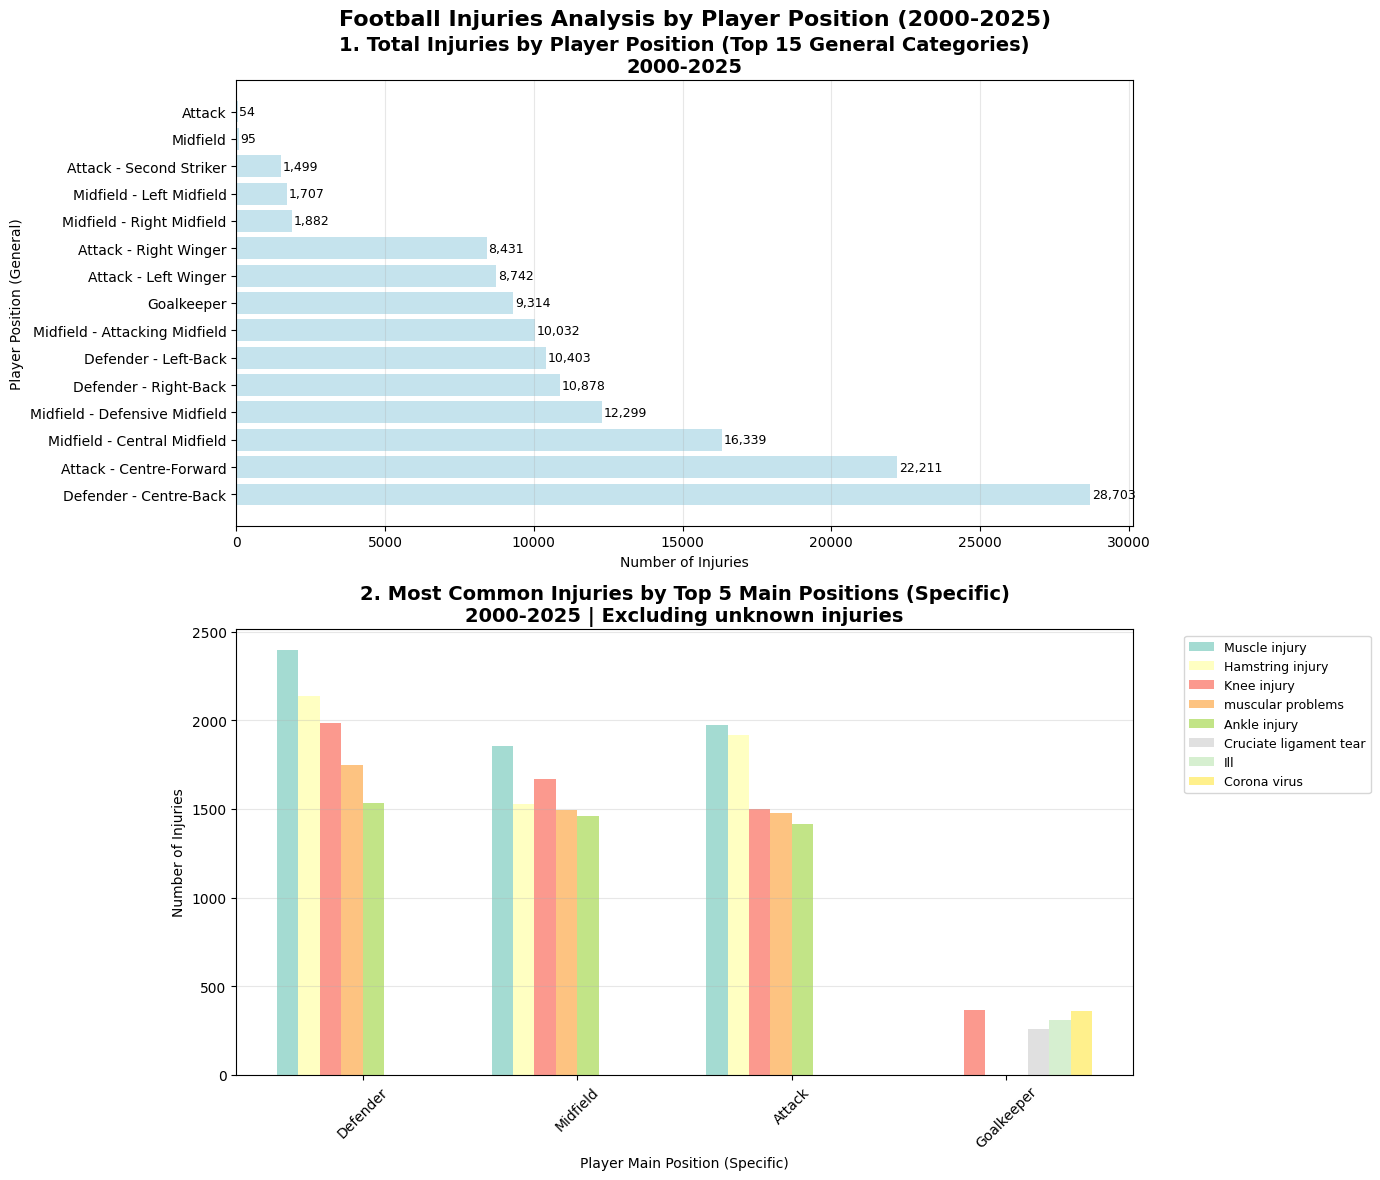


📋 DETAILED MAIN POSITION ANALYSIS (Top 5 - 2000-2025):

Defender:
  Total injuries: 50,059
  Average days missed: 52.4
  Average games missed: 6.7
  Top 5 injuries:
    - unknown injury: 9,637 (19.3%)
    - Muscle injury: 2,395 (4.8%)
    - Hamstring injury: 2,136 (4.3%)
    - Knee injury: 1,985 (4.0%)
    - muscular problems: 1,747 (3.5%)

Midfield:
  Total injuries: 42,354
  Average days missed: 51.5
  Average games missed: 6.7
  Top 5 injuries:
    - unknown injury: 8,122 (19.2%)
    - Muscle injury: 1,853 (4.4%)
    - Knee injury: 1,671 (3.9%)
    - Hamstring injury: 1,529 (3.6%)
    - muscular problems: 1,494 (3.5%)

Attack:
  Total injuries: 40,937
  Average days missed: 49.6
  Average games missed: 6.4
  Top 5 injuries:
    - unknown injury: 7,757 (18.9%)
    - Muscle injury: 1,973 (4.8%)
    - Hamstring injury: 1,915 (4.7%)
    - Knee injury: 1,501 (3.7%)
    - muscular problems: 1,475 (3.6%)

Goalkeeper:
  Total injuries: 9,314
  Average days missed: 57.8
  Average games miss

In [22]:
# Create subplots for position analysis
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Football Injuries Analysis by Player Position (2000-2025)', fontsize=16, fontweight='bold')

# Filter data from year 2000 onwards
injuries_from_2000 = injuries_with_profile[injuries_with_profile['from_date'].dt.year >= 2000].copy()

# 1. Total Injuries by Position (general categories)
position_injuries = injuries_from_2000['position'].value_counts().head(15)

bars1 = axes[0].barh(range(len(position_injuries)), position_injuries.values, 
                     color='lightblue', alpha=0.7)
axes[0].set_title('1. Total Injuries by Player Position (Top 15 General Categories)\n2000-2025', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Injuries')
axes[0].set_ylabel('Player Position (General)')
axes[0].set_yticks(range(len(position_injuries)))
axes[0].set_yticklabels(position_injuries.index)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width + 50, bar.get_y() + bar.get_height()/2., 
                f'{int(width):,}', ha='left', va='center', fontsize=9)

# 2. Most Common Injuries by Main Position (specific positions) - EXCLUDING UNKNOWN INJURIES
# Filter out unknown injuries first
injuries_without_unknown = injuries_from_2000[injuries_from_2000['injury_reason'] != 'unknown injury']

top_5_main_positions = injuries_without_unknown['main_position'].value_counts().head(5).index

# Prepare data for grouped bar chart
common_injuries_by_main_position = {}
for main_position in top_5_main_positions:
    position_data = injuries_without_unknown[injuries_without_unknown['main_position'] == main_position]
    top_injuries = position_data['injury_reason'].value_counts().head(5)
    common_injuries_by_main_position[main_position] = top_injuries

# Create grouped bar chart
main_positions_list = list(top_5_main_positions)

# Take top 8 most common injuries across all positions for clarity (excluding unknown)
top_injuries_across = injuries_without_unknown['injury_reason'].value_counts().head(8).index

x = np.arange(len(main_positions_list))
width = 0.1  # Width of each bar
colors = plt.cm.Set3(np.linspace(0, 1, len(top_injuries_across)))

for i, injury in enumerate(top_injuries_across):
    injury_counts = []
    for main_position in main_positions_list:
        if injury in common_injuries_by_main_position[main_position]:
            injury_counts.append(common_injuries_by_main_position[main_position][injury])
        else:
            injury_counts.append(0)
    
    axes[1].bar(x + i*width, injury_counts, width, label=injury, color=colors[i], alpha=0.8)

axes[1].set_title('2. Most Common Injuries by Top 5 Main Positions (Specific)\n2000-2025 | Excluding unknown injuries', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Player Main Position (Specific)')
axes[1].set_ylabel('Number of Injuries')
axes[1].set_xticks(x + width * (len(top_injuries_across)-1)/2)
axes[1].set_xticklabels(main_positions_list, rotation=45)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\n📋 DETAILED MAIN POSITION ANALYSIS (Top 5 - 2000-2025):")
print("=" * 65)
for main_position in top_5_main_positions:
    position_data = injuries_from_2000[injuries_from_2000['main_position'] == main_position]
    total_injuries = len(position_data)
    avg_days_missed = position_data['days_missed'].mean()
    avg_games_missed = position_data['games_missed'].mean()
    
    print(f"\n{main_position}:")
    print(f"  Total injuries: {total_injuries:,}")
    print(f"  Average days missed: {avg_days_missed:.1f}")
    print(f"  Average games missed: {avg_games_missed:.1f}")
    print(f"  Top 5 injuries:")
    top_5 = position_data['injury_reason'].value_counts().head(5)
    for injury, count in top_5.items():
        percentage = (count / total_injuries) * 100
        print(f"    - {injury}: {count:,} ({percentage:.1f}%)")

👥 DEMOGRAPHIC ANALYSIS OF INJURIES
Total injuries for demographic analysis (2000-2025): 142,664


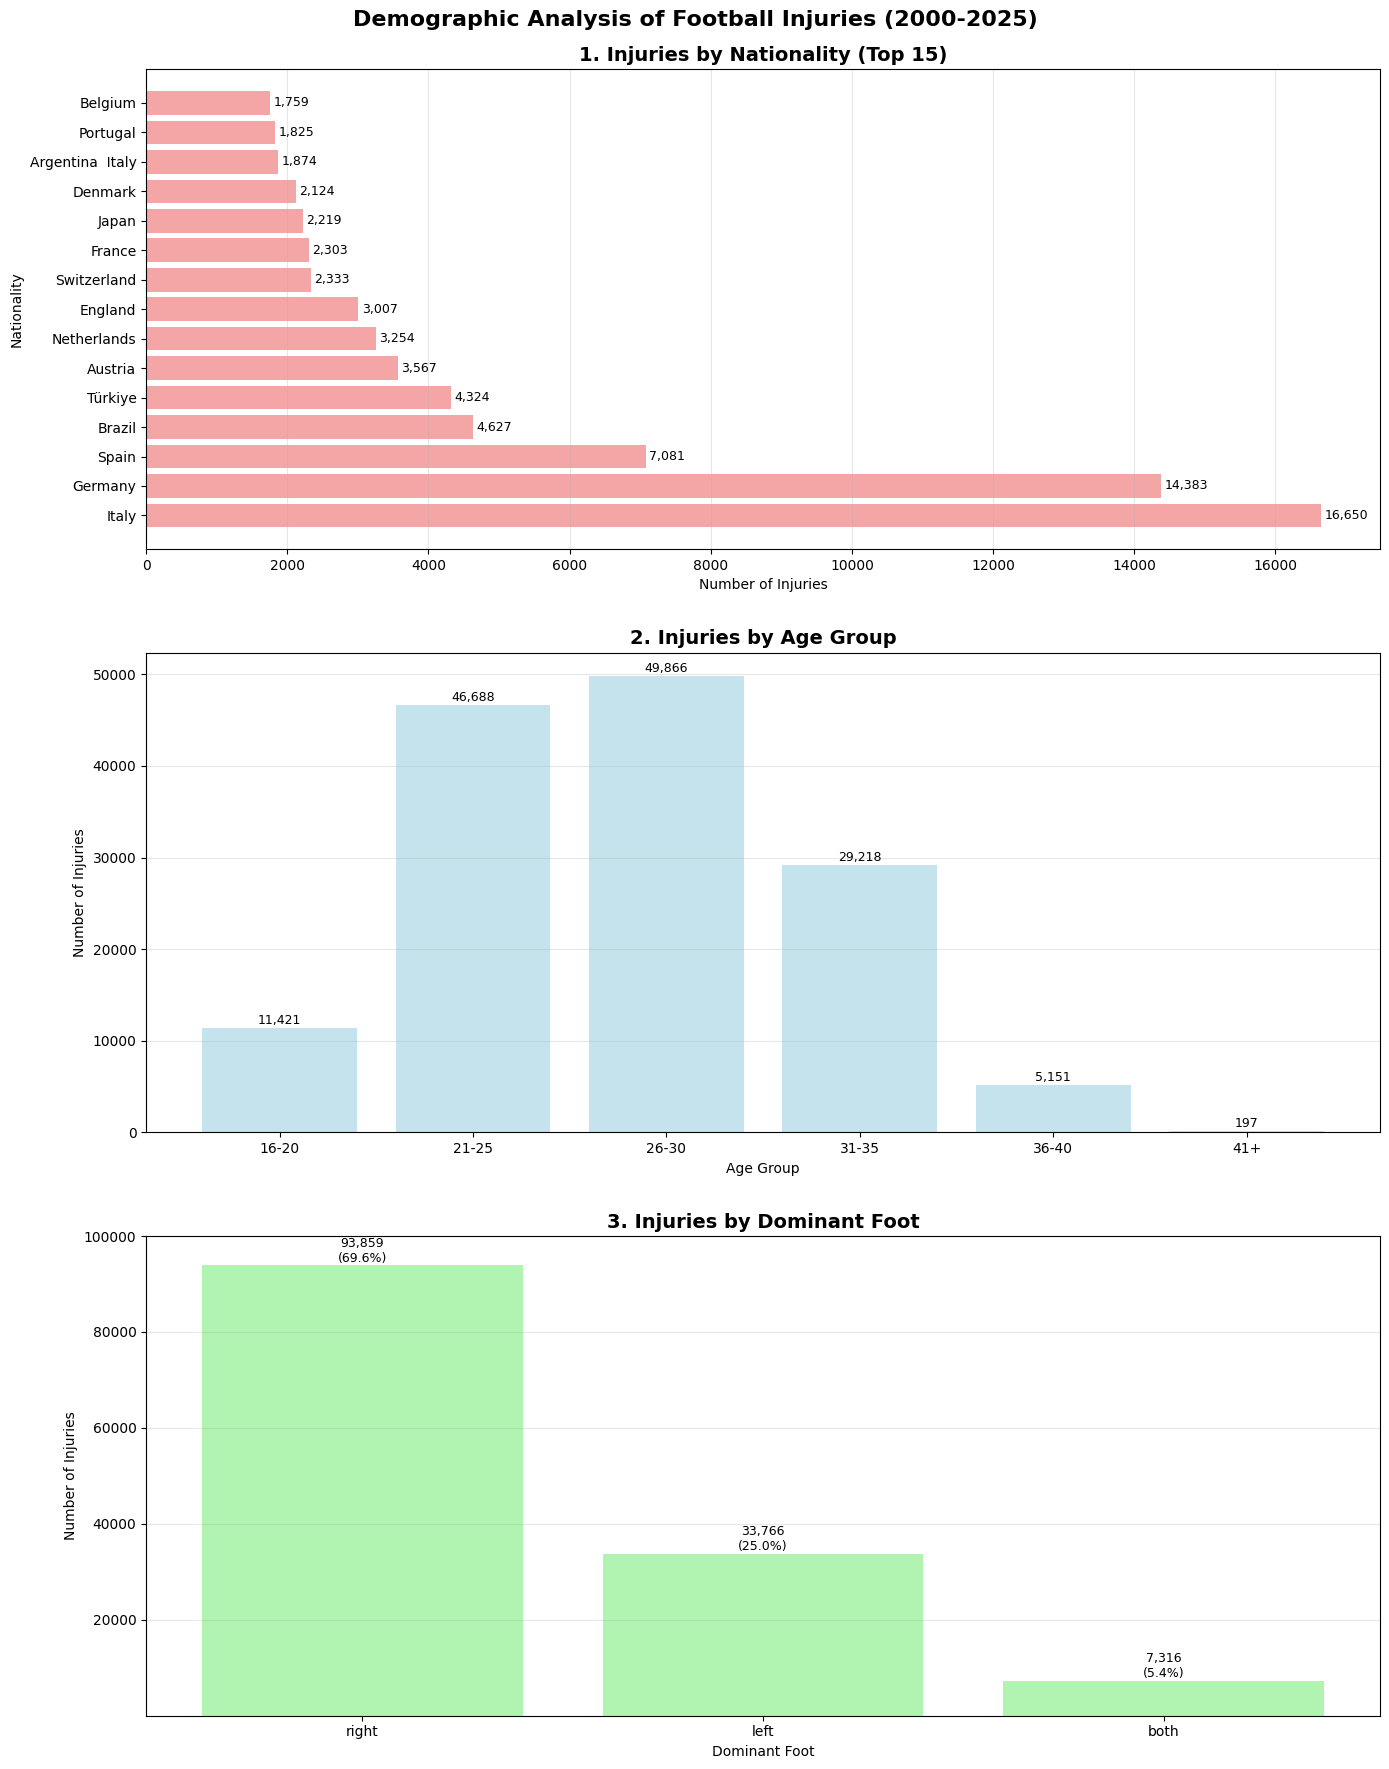


📋 DETAILED DEMOGRAPHIC ANALYSIS:

🏴 NATIONALITY ANALYSIS (Top 10):
----------------------------------------
 1. Italy           16,650 injuries ( 11.7%)
 2. Germany         14,383 injuries ( 10.1%)
 3. Spain            7,081 injuries (  5.0%)
 4. Brazil           4,627 injuries (  3.2%)
 5. Türkiye          4,324 injuries (  3.0%)
 6. Austria          3,567 injuries (  2.5%)
 7. Netherlands      3,254 injuries (  2.3%)
 8. England          3,007 injuries (  2.1%)
 9. Switzerland      2,333 injuries (  1.6%)
10. France           2,303 injuries (  1.6%)

🎂 AGE ANALYSIS:
--------------------
Average age at injury: 26.5 years
Youngest injured: -2.6 years
Oldest injured: 46.9 years

Age distribution:
  16-20: 11,421 injuries (  8.0%)
  21-25: 46,688 injuries ( 32.7%)
  26-30: 49,866 injuries ( 35.0%)
  31-35: 29,218 injuries ( 20.5%)
  36-40:  5,151 injuries (  3.6%)
  41+:    197 injuries (  0.1%)

🦶 FOOT DOMINANCE ANALYSIS:
------------------------------
  right: 93,859 injuries ( 69.6%)

In [23]:
# Demographic Analysis of Injuries
print("👥 DEMOGRAPHIC ANALYSIS OF INJURIES")
print("=" * 40)

# Merge injuries with player profiles for demographic data
injuries_demographic = pd.merge(
    player_injuries_clean,
    player_profiles[['player_id', 'citizenship', 'date_of_birth', 'foot']],
    on='player_id',
    how='left'
)

# Filter from 2000 onwards
injuries_demographic = injuries_demographic[injuries_demographic['from_date'].dt.year >= 2000].copy()

print(f"Total injuries for demographic analysis (2000-2025): {len(injuries_demographic):,}")

# Create subplots for demographic analysis
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
fig.suptitle('Demographic Analysis of Football Injuries (2000-2025)', fontsize=16, fontweight='bold')

# 1. Injuries by Nationality (Top 15)
nationality_injuries = injuries_demographic['citizenship'].value_counts().head(15)

bars1 = axes[0].barh(range(len(nationality_injuries)), nationality_injuries.values, 
                     color='lightcoral', alpha=0.7)
axes[0].set_title('\n1. Injuries by Nationality (Top 15)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Injuries')
axes[0].set_ylabel('Nationality')
axes[0].set_yticks(range(len(nationality_injuries)))
axes[0].set_yticklabels(nationality_injuries.index)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width + 50, bar.get_y() + bar.get_height()/2., 
                f'{int(width):,}', ha='left', va='center', fontsize=9)

# 2. Injuries by Age at Time of Injury
# Calculate age at time of injury
injuries_demographic['date_of_birth'] = pd.to_datetime(injuries_demographic['date_of_birth'])
injuries_demographic['age_at_injury'] = (
    injuries_demographic['from_date'] - injuries_demographic['date_of_birth']
).dt.days / 365.25

# Create age groups
age_bins = [16, 20, 25, 30, 35, 40, 50]
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41+']
injuries_demographic['age_group'] = pd.cut(injuries_demographic['age_at_injury'], 
                                          bins=age_bins, labels=age_labels, right=False)

age_injuries = injuries_demographic['age_group'].value_counts().sort_index()

bars2 = axes[1].bar(age_injuries.index, age_injuries.values, color='lightblue', alpha=0.7)
axes[1].set_title('\n2. Injuries by Age Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Number of Injuries')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 100,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 3. Injuries by Dominant Foot
foot_injuries = injuries_demographic['foot'].value_counts()

bars3 = axes[2].bar(foot_injuries.index, foot_injuries.values, color='lightgreen', alpha=0.7)
axes[2].set_title('3. Injuries by Dominant Foot', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Dominant Foot')
axes[2].set_ylabel('Number of Injuries')
axes[2].set_ylim(1, 100000)
axes[2].grid(True, alpha=0.3, axis='y')

# Add value labels and percentages
total_foot_injuries = foot_injuries.sum()
for i, bar in enumerate(bars3):
    height = bar.get_height()
    percentage = (height / total_foot_injuries) * 100
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 100,
                f'{int(height):,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\n📋 DETAILED DEMOGRAPHIC ANALYSIS:")
print("=" * 50)

print(f"\n🏴 NATIONALITY ANALYSIS (Top 10):")
print("-" * 40)
for i, (country, count) in enumerate(nationality_injuries.head(10).items(), 1):
    percentage = (count / len(injuries_demographic)) * 100
    print(f"{i:2d}. {country:<15} {count:>6,} injuries ({percentage:>5.1f}%)")

print(f"\n🎂 AGE ANALYSIS:")
print("-" * 20)
print(f"Average age at injury: {injuries_demographic['age_at_injury'].mean():.1f} years")
print(f"Youngest injured: {injuries_demographic['age_at_injury'].min():.1f} years")
print(f"Oldest injured: {injuries_demographic['age_at_injury'].max():.1f} years")
print(f"\nAge distribution:")
for age_group, count in age_injuries.items():
    percentage = (count / len(injuries_demographic)) * 100
    print(f"  {age_group}: {count:>6,} injuries ({percentage:>5.1f}%)")

print(f"\n🦶 FOOT DOMINANCE ANALYSIS:")
print("-" * 30)
for foot, count in foot_injuries.items():
    percentage = (count / total_foot_injuries) * 100
    print(f"  {foot}: {count:>6,} injuries ({percentage:>5.1f}%)")

# Check data quality
print(f"\n📊 DEMOGRAPHIC DATA QUALITY:")
print(f"Missing citizenship: {injuries_demographic['citizenship'].isna().sum():,}")
print(f"Missing date_of_birth: {injuries_demographic['date_of_birth'].isna().sum():,}")
print(f"Missing foot: {injuries_demographic['foot'].isna().sum():,}")

In [24]:
# Analysis of Injuries by Teams and Competitions
print("🏥 ANALYSIS OF INJURIES BY TEAMS AND COMPETITIONS")
print("=" * 50)

# Merge injuries with player_performances to get team and competition data
injuries_with_teams = pd.merge(
    player_injuries_clean,
    player_performances[['player_id', 'season_name', 'competition_id', 'competition_name', 'team_id', 'team_name']],
    on=['player_id', 'season_name'],
    how='left'
)

# Filter from 2000 onwards
injuries_with_teams = injuries_with_teams[injuries_with_teams['from_date'].dt.year >= 2000].copy()

print(f"Total injuries with team/competition data: {len(injuries_with_teams):,}")
print(f"Unique teams: {injuries_with_teams['team_name'].nunique():,}")
print(f"Unique competitions: {injuries_with_teams['competition_name'].nunique():,}")

# Check data quality
print(f"\n📊 DATA QUALITY:")
print(f"Missing team_name: {injuries_with_teams['team_name'].isna().sum():,}")
print(f"Missing competition_name: {injuries_with_teams['competition_name'].isna().sum():,}")

🏥 ANALYSIS OF INJURIES BY TEAMS AND COMPETITIONS
Total injuries with team/competition data: 371,729
Unique teams: 4,658
Unique competitions: 1,106

📊 DATA QUALITY:
Missing team_name: 12,582
Missing competition_name: 12,582


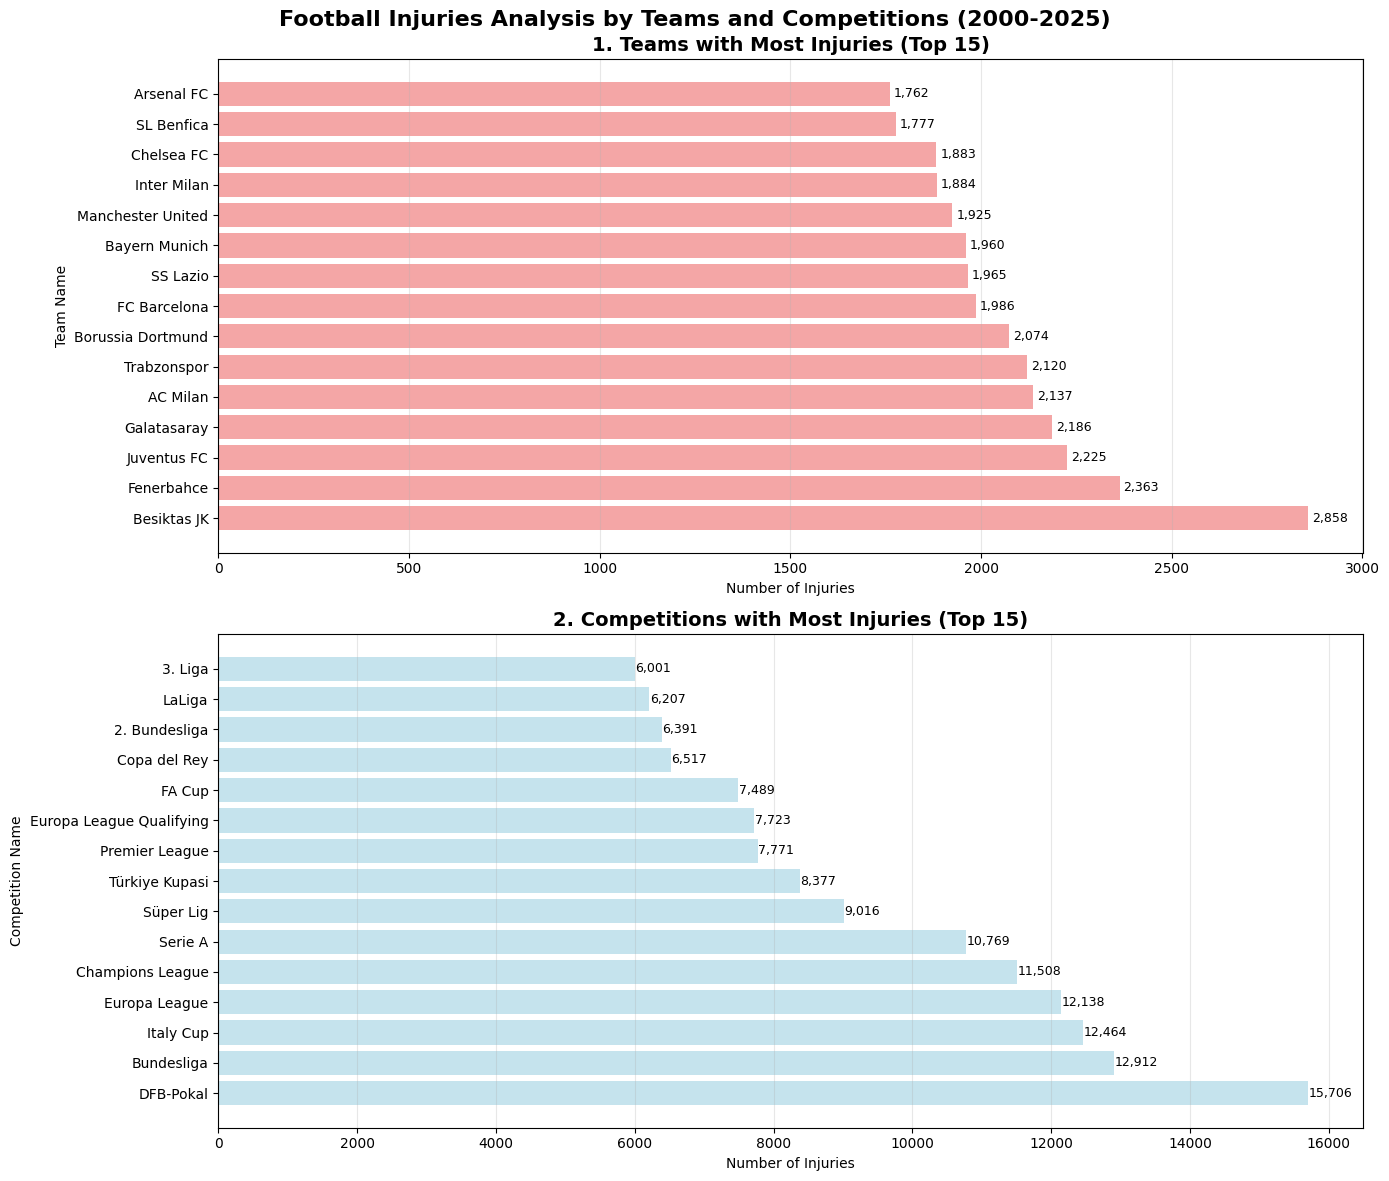


📋 DETAILED ANALYSIS:

🏆 TOP 10 TEAMS WITH MOST INJURIES:
----------------------------------------
 1. Besiktas JK                2,858 injuries |  27.0 avg days |  4.3 avg games
 2. Fenerbahce                 2,363 injuries |  24.1 avg days |  4.4 avg games
 3. Juventus FC                2,225 injuries |  27.4 avg days |  5.4 avg games
 4. Galatasaray                2,186 injuries |  24.0 avg days |  4.5 avg games
 5. AC Milan                   2,137 injuries |  28.4 avg days |  5.7 avg games
 6. Trabzonspor                2,120 injuries |  23.3 avg days |  4.0 avg games
 7. Borussia Dortmund          2,074 injuries |  24.0 avg days |  4.1 avg games
 8. FC Barcelona               1,986 injuries |  33.9 avg days |  6.0 avg games
 9. SS Lazio                   1,965 injuries |  23.1 avg days |  4.1 avg games
10. Bayern Munich              1,960 injuries |  24.2 avg days |  4.3 avg games

🎯 TOP 10 COMPETITIONS WITH MOST INJURIES:
---------------------------------------------
 1. DFB-Poka

In [25]:
# Create subplots for teams and competitions analysis
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Football Injuries Analysis by Teams and Competitions (2000-2025)', fontsize=16, fontweight='bold')

# 1. Top 15 Teams with Most Injuries
team_injuries = injuries_with_teams['team_name'].value_counts().head(15)

bars1 = axes[0].barh(range(len(team_injuries)), team_injuries.values, 
                     color='lightcoral', alpha=0.7)
axes[0].set_title('1. Teams with Most Injuries (Top 15)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Injuries')
axes[0].set_ylabel('Team Name')
axes[0].set_yticks(range(len(team_injuries)))
axes[0].set_yticklabels(team_injuries.index)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width + 10, bar.get_y() + bar.get_height()/2., 
                f'{int(width):,}', ha='left', va='center', fontsize=9)

# 2. Top 15 Competitions with Most Injuries
competition_injuries = injuries_with_teams['competition_name'].value_counts().head(15)

bars2 = axes[1].barh(range(len(competition_injuries)), competition_injuries.values, 
                     color='lightblue', alpha=0.7)
axes[1].set_title('2. Competitions with Most Injuries (Top 15)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Injuries')
axes[1].set_ylabel('Competition Name')
axes[1].set_yticks(range(len(competition_injuries)))
axes[1].set_yticklabels(competition_injuries.index)
axes[1].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    axes[1].text(width + 10, bar.get_y() + bar.get_height()/2., 
                f'{int(width):,}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\n📋 DETAILED ANALYSIS:")
print("=" * 50)

print(f"\n🏆 TOP 10 TEAMS WITH MOST INJURIES:")
print("-" * 40)
for i, (team, count) in enumerate(team_injuries.head(10).items(), 1):
    team_data = injuries_with_teams[injuries_with_teams['team_name'] == team]
    avg_days = team_data['days_missed'].mean()
    avg_games = team_data['games_missed'].mean()
    print(f"{i:2d}. {team:<25} {count:>6,} injuries | {avg_days:>5.1f} avg days | {avg_games:>4.1f} avg games")

print(f"\n🎯 TOP 10 COMPETITIONS WITH MOST INJURIES:")
print("-" * 45)
for i, (competition, count) in enumerate(competition_injuries.head(10).items(), 1):
    comp_data = injuries_with_teams[injuries_with_teams['competition_name'] == competition]
    avg_days = comp_data['days_missed'].mean()
    avg_games = comp_data['games_missed'].mean()
    print(f"{i:2d}. {competition:<30} {count:>6,} injuries | {avg_days:>5.1f} avg days | {avg_games:>4.1f} avg games")

# Additional insights
print(f"\n📊 ADDITIONAL INSIGHTS:")
print("-" * 25)
total_injuries_with_data = len(injuries_with_teams)
print(f"Total injuries analyzed: {total_injuries_with_data:,}")
print(f"Coverage: {(total_injuries_with_data/len(injuries_with_teams[injuries_with_teams['from_date'].dt.year >= 2000]))*100:.1f}% of injuries have team/competition data")
print(f"Most injured team represents: {(team_injuries.iloc[0]/total_injuries_with_data)*100:.1f}% of all injuries")
print(f"Most competitive competition represents: {(competition_injuries.iloc[0]/total_injuries_with_data)*100:.1f}% of all injuries")

🏥 ANALYSIS OF TOP INJURIES BY TOP CLUBS
Top 5 Clubs with Most Injuries:
1. Besiktas JK - 2,858 injuries
2. Fenerbahce - 2,363 injuries
3. Juventus FC - 2,225 injuries
4. Galatasaray - 2,186 injuries
5. AC Milan - 2,137 injuries


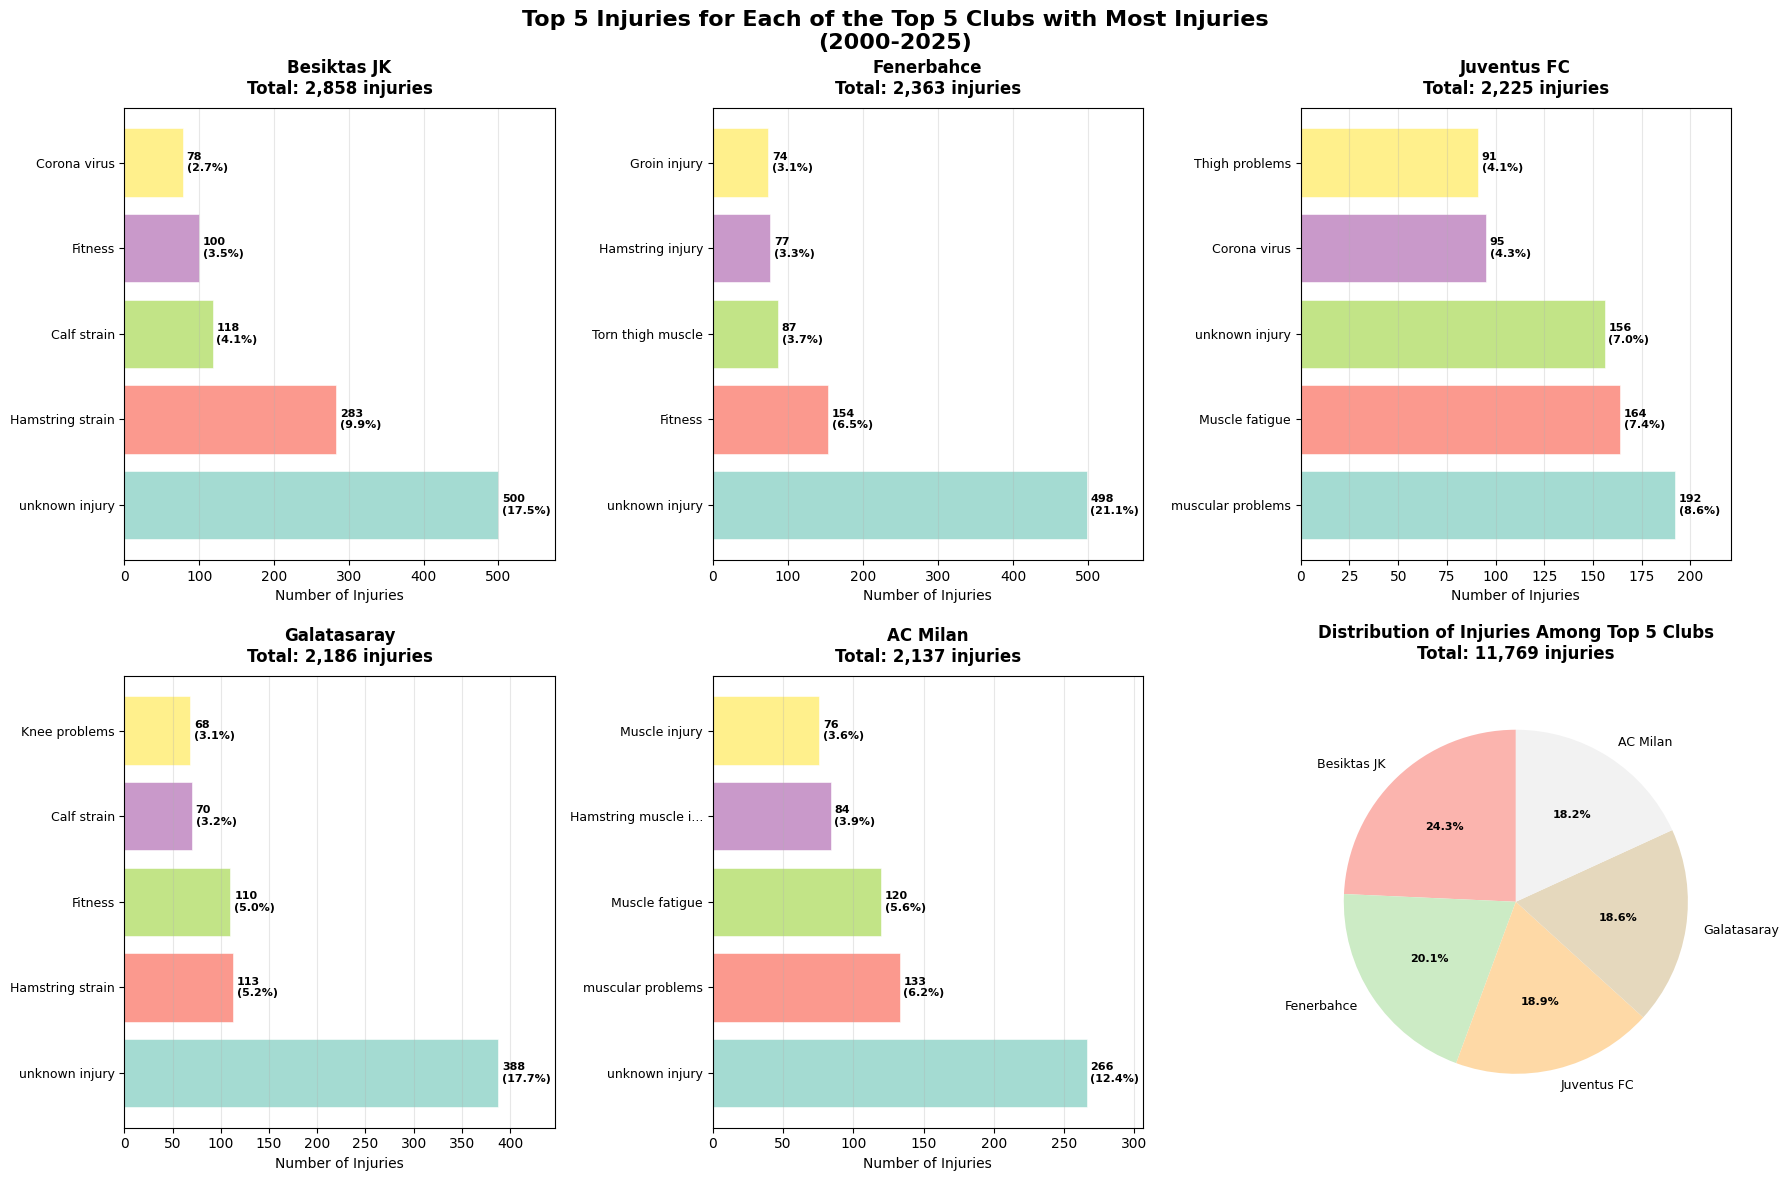


📋 COMPARISON OF TOP INJURIES ACROSS TOP CLUBS:

Besiktas JK:
  Total: 2,858 injuries | 27.0 avg days | 4.3 avg games
  Top 3 injuries:
    1. unknown injury             500 (17.5%) |  19.6 avg days
    2. Hamstring strain           283 ( 9.9%) |  16.8 avg days
    3. Calf strain                118 ( 4.1%) |  24.2 avg days

Fenerbahce:
  Total: 2,363 injuries | 24.1 avg days | 4.4 avg games
  Top 3 injuries:
    1. unknown injury             498 (21.1%) |  15.6 avg days
    2. Fitness                    154 ( 6.5%) |  10.0 avg days
    3. Torn thigh muscle           87 ( 3.7%) |  23.6 avg days

Juventus FC:
  Total: 2,225 injuries | 27.4 avg days | 5.4 avg games
  Top 3 injuries:
    1. muscular problems          192 ( 8.6%) |  23.0 avg days
    2. Muscle fatigue             164 ( 7.4%) |  11.5 avg days
    3. unknown injury             156 ( 7.0%) |  21.0 avg days

Galatasaray:
  Total: 2,186 injuries | 24.0 avg days | 4.5 avg games
  Top 3 injuries:
    1. unknown injury             

In [26]:
# Analysis of Top Injuries by Top Clubs
print("🏥 ANALYSIS OF TOP INJURIES BY TOP CLUBS")
print("=" * 45)

# Get top 5 clubs with most injuries
top_5_clubs = injuries_with_teams['team_name'].value_counts().head(5).index

print(f"Top 5 Clubs with Most Injuries:")
for i, club in enumerate(top_5_clubs, 1):
    club_count = injuries_with_teams[injuries_with_teams['team_name'] == club].shape[0]
    print(f"{i}. {club} - {club_count:,} injuries")

# Create subplots for each club
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2x3 grid (5 clubs + 1 summary)
fig.suptitle('Top 5 Injuries for Each of the Top 5 Clubs with Most Injuries\n(2000-2025)', 
             fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

# Analyze each top club
for idx, club in enumerate(top_5_clubs):
    ax = axes[idx]
    
    club_data = injuries_with_teams[injuries_with_teams['team_name'] == club]
    top_5_injuries = club_data['injury_reason'].value_counts().head(5)
    total_club_injuries = len(club_data)
    
    # Prepare data for the bar chart
    injuries_names = list(top_5_injuries.index)
    injuries_counts = list(top_5_injuries.values)
    percentages = [(count / total_club_injuries) * 100 for count in injuries_counts]
    
    # Create horizontal bar chart
    bars = ax.barh(range(len(injuries_names)), injuries_counts, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(injuries_names))), 
                   alpha=0.8, edgecolor='white', linewidth=0.5)
    
    # Customize the chart
    ax.set_title(f'{club}\nTotal: {total_club_injuries:,} injuries', 
                 fontsize=12, fontweight='bold', pad=10)
    ax.set_yticks(range(len(injuries_names)))
    
    # Shorten long injury names for better display
    shortened_labels = []
    for injury in injuries_names:
        if len(injury) > 20:
            shortened_labels.append(injury[:18] + '...')
        else:
            shortened_labels.append(injury)
    
    ax.set_yticklabels(shortened_labels, fontsize=9)
    ax.set_xlabel('Number of Injuries', fontsize=10)
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_xlim(0, max(injuries_counts) * 1.15)
    
    # Add value and percentage labels on bars
    for i, (bar, count, percentage) in enumerate(zip(bars, injuries_counts, percentages)):
        width = bar.get_width()
        ax.text(width + max(injuries_counts)*0.01, bar.get_y() + bar.get_height()/2., 
                f'{count:,}\n({percentage:.1f}%)', 
                ha='left', va='center', fontsize=8, fontweight='bold')

# Create summary chart in the last subplot (position 5)
ax_summary = axes[5]

# Calculate overall percentages for top clubs
club_totals = []
club_names = []
for club in top_5_clubs:
    club_count = injuries_with_teams[injuries_with_teams['team_name'] == club].shape[0]
    club_totals.append(club_count)
    club_names.append(club)

total_top_clubs_injuries = sum(club_totals)
percentages = [(count / total_top_clubs_injuries) * 100 for count in club_totals]

# Create summary pie chart
wedges, texts, autotexts = ax_summary.pie(club_totals, labels=club_names, 
                                         autopct='%1.1f%%', startangle=90,
                                         colors=plt.cm.Pastel1(np.linspace(0, 1, len(club_totals))))

# Improve label appearance
for text in texts:
    text.set_fontsize(9)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')

ax_summary.set_title('Distribution of Injuries Among Top 5 Clubs\nTotal: {:,} injuries'.format(total_top_clubs_injuries), 
                    fontsize=12, fontweight='bold', pad=20)

# Remove any unused subplots
for idx in range(6, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Print detailed comparison
print(f"\n📋 COMPARISON OF TOP INJURIES ACROSS TOP CLUBS:")
print("=" * 55)

for club in top_5_clubs:
    club_data = injuries_with_teams[injuries_with_teams['team_name'] == club]
    top_3_injuries = club_data['injury_reason'].value_counts().head(3)
    total_club_injuries = len(club_data)
    avg_days = club_data['days_missed'].mean()
    avg_games = club_data['games_missed'].mean()
    
    print(f"\n{club}:")
    print(f"  Total: {total_club_injuries:,} injuries | {avg_days:.1f} avg days | {avg_games:.1f} avg games")
    print(f"  Top 3 injuries:")
    for i, (injury, count) in enumerate(top_3_injuries.items(), 1):
        percentage = (count / total_club_injuries) * 100
        injury_avg_days = club_data[club_data['injury_reason'] == injury]['days_missed'].mean()
        print(f"    {i}. {injury:<25} {count:>4,} ({percentage:>4.1f}%) | {injury_avg_days:>5.1f} avg days")

# Find common patterns
print(f"\n🔍 COMMON PATTERNS ACROSS CLUBS:")
print("-" * 35)

all_top_injuries = []
for club in top_5_clubs:
    club_data = injuries_with_teams[injuries_with_teams['team_name'] == club]
    top_injuries = club_data['injury_reason'].value_counts().head(3)
    for injury in top_injuries.index:
        all_top_injuries.append(injury)

from collections import Counter
common_injuries = Counter(all_top_injuries)
print("Most frequently appearing injuries in top 3 across all clubs:")
for injury, count in common_injuries.most_common(5):
    print(f"  {injury}: appears in {count} clubs' top 3")

🏆 ANALYSIS OF TOP INJURIES BY TOP COMPETITIONS
Top 5 Competitions with Most Injuries:
1. DFB-Pokal - 15,706 injuries
2. Bundesliga - 12,912 injuries
3. Italy Cup - 12,464 injuries
4. Europa League - 12,138 injuries
5. Champions League - 11,508 injuries


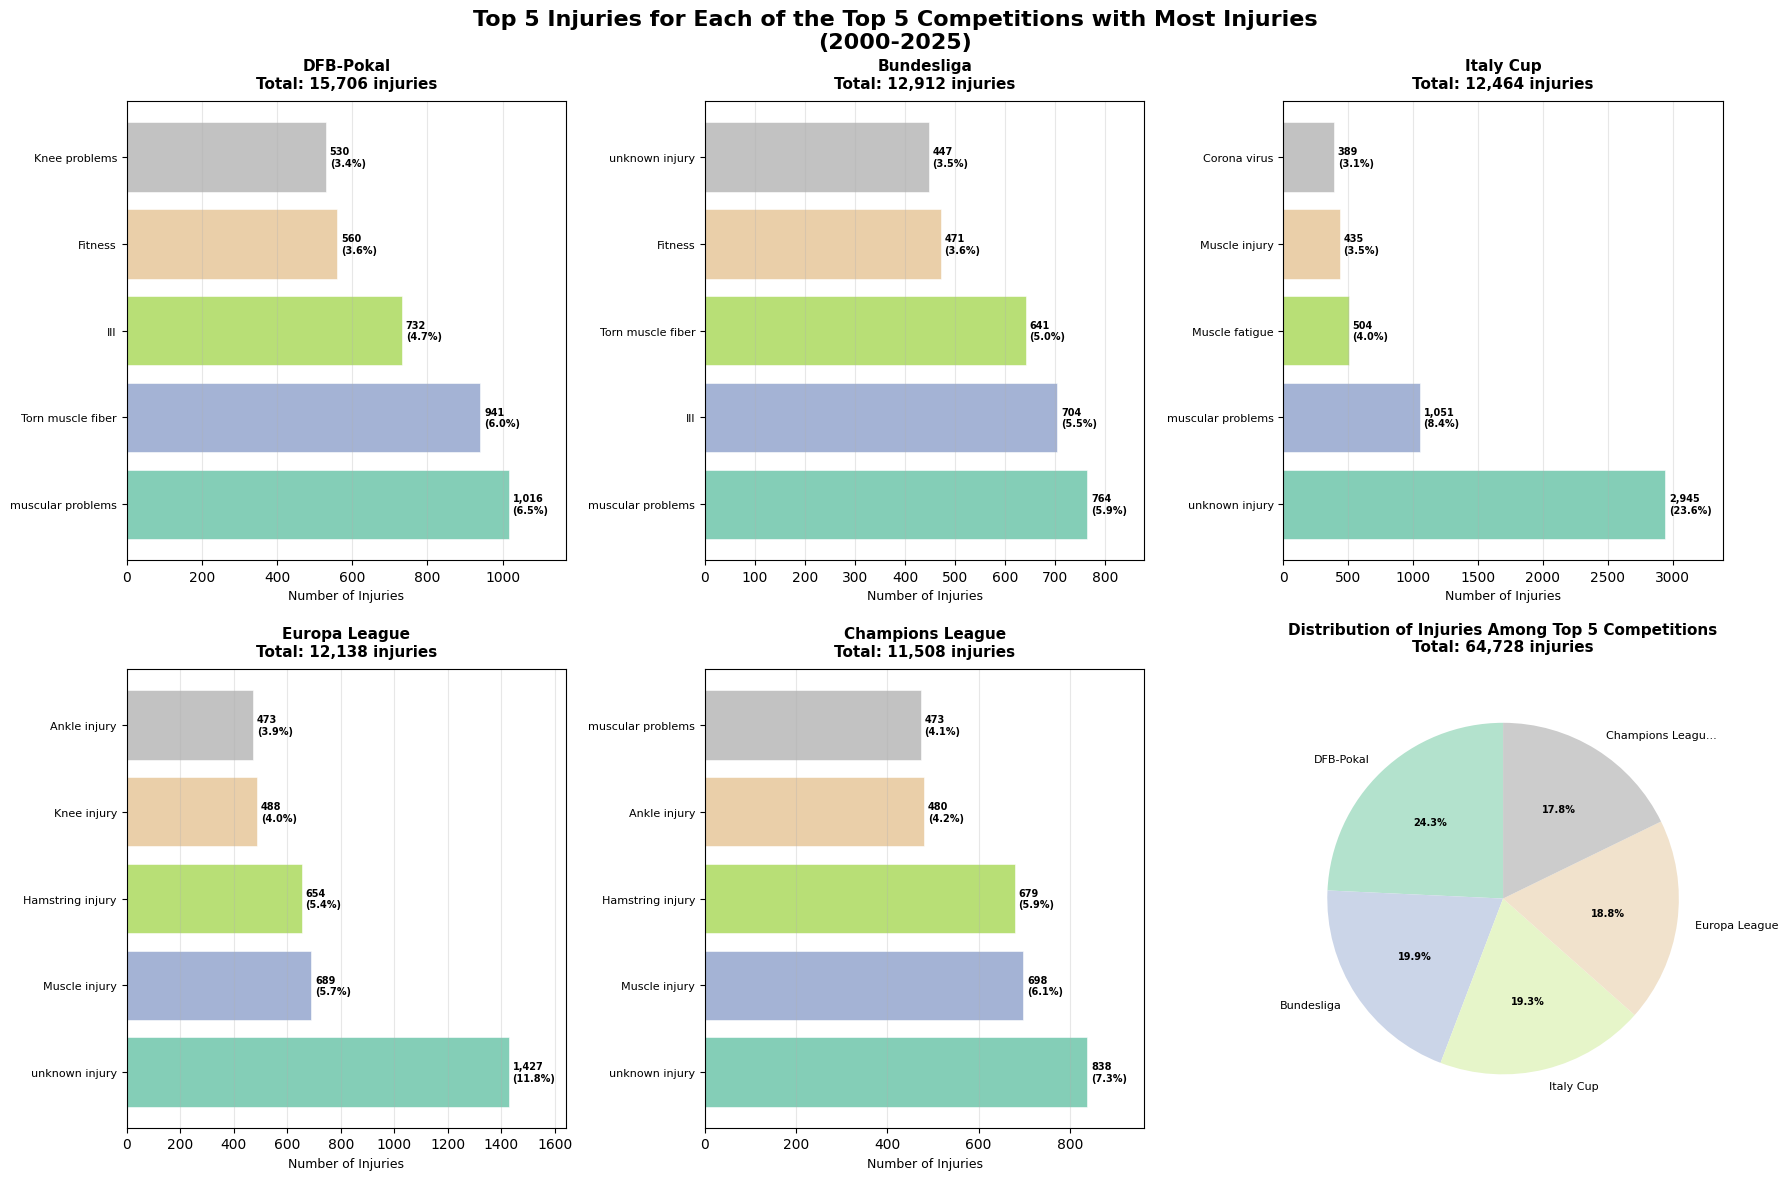


📋 COMPARISON OF TOP INJURIES ACROSS TOP COMPETITIONS:

DFB-Pokal:
  Total: 15,706 injuries | 32.9 avg days | 4.4 avg games
  Top 3 injuries:
    1. muscular problems         1,016 ( 6.5%) |  16.3 avg days
    2. Torn muscle fiber          941 ( 6.0%) |  28.7 avg days
    3. Ill                        732 ( 4.7%) |   9.4 avg days

Bundesliga:
  Total: 12,912 injuries | 34.0 avg days | 4.9 avg games
  Top 3 injuries:
    1. muscular problems          764 ( 5.9%) |  16.3 avg days
    2. Ill                        704 ( 5.5%) |   8.1 avg days
    3. Torn muscle fiber          641 ( 5.0%) |  30.2 avg days

Italy Cup:
  Total: 12,464 injuries | 31.4 avg days | 4.7 avg games
  Top 3 injuries:
    1. unknown injury            2,945 (23.6%) |  22.7 avg days
    2. muscular problems         1,051 ( 8.4%) |  22.0 avg days
    3. Muscle fatigue             504 ( 4.0%) |  12.2 avg days

Europa League:
  Total: 12,138 injuries | 33.2 avg days | 5.8 avg games
  Top 3 injuries:
    1. unknown injury 

In [27]:
# Analysis of Top Injuries by Top Competitions
print("🏆 ANALYSIS OF TOP INJURIES BY TOP COMPETITIONS")
print("=" * 50)

# Get top 5 competitions with most injuries
top_5_competitions = injuries_with_teams['competition_name'].value_counts().head(5).index

print(f"Top 5 Competitions with Most Injuries:")
for i, competition in enumerate(top_5_competitions, 1):
    comp_count = injuries_with_teams[injuries_with_teams['competition_name'] == competition].shape[0]
    print(f"{i}. {competition} - {comp_count:,} injuries")

# Create subplots for each competition
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2x3 grid (5 competitions + 1 summary)
fig.suptitle('Top 5 Injuries for Each of the Top 5 Competitions with Most Injuries\n(2000-2025)', 
             fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

# Analyze each top competition
for idx, competition in enumerate(top_5_competitions):
    ax = axes[idx]
    
    comp_data = injuries_with_teams[injuries_with_teams['competition_name'] == competition]
    top_5_injuries = comp_data['injury_reason'].value_counts().head(5)
    total_comp_injuries = len(comp_data)
    
    # Prepare data for the bar chart
    injuries_names = list(top_5_injuries.index)
    injuries_counts = list(top_5_injuries.values)
    percentages = [(count / total_comp_injuries) * 100 for count in injuries_counts]
    
    # Create horizontal bar chart
    bars = ax.barh(range(len(injuries_names)), injuries_counts, 
                   color=plt.cm.Set2(np.linspace(0, 1, len(injuries_names))), 
                   alpha=0.8, edgecolor='white', linewidth=0.5)
    
    # Customize the chart
    competition_short = competition[:25] + '...' if len(competition) > 25 else competition
    ax.set_title(f'{competition_short}\nTotal: {total_comp_injuries:,} injuries', 
                 fontsize=11, fontweight='bold', pad=10)
    ax.set_yticks(range(len(injuries_names)))
    
    # Shorten long injury names for better display
    shortened_labels = []
    for injury in injuries_names:
        if len(injury) > 20:
            shortened_labels.append(injury[:18] + '...')
        else:
            shortened_labels.append(injury)
    
    ax.set_yticklabels(shortened_labels, fontsize=8)
    ax.set_xlabel('Number of Injuries', fontsize=9)
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_xlim(0, max(injuries_counts) * 1.15)
    
    # Add value and percentage labels on bars
    for i, (bar, count, percentage) in enumerate(zip(bars, injuries_counts, percentages)):
        width = bar.get_width()
        ax.text(width + max(injuries_counts)*0.01, bar.get_y() + bar.get_height()/2., 
                f'{count:,}\n({percentage:.1f}%)', 
                ha='left', va='center', fontsize=7, fontweight='bold')

# Create summary chart in the last subplot (position 5)
ax_summary = axes[5]

# Calculate overall percentages for top competitions
comp_totals = []
comp_names = []
for competition in top_5_competitions:
    comp_count = injuries_with_teams[injuries_with_teams['competition_name'] == competition].shape[0]
    comp_totals.append(comp_count)
    # Shorten competition names for pie chart
    short_name = competition[:15] + '...' if len(competition) > 15 else competition
    comp_names.append(short_name)

total_top_comps_injuries = sum(comp_totals)
percentages = [(count / total_top_comps_injuries) * 100 for count in comp_totals]

# Create summary pie chart
wedges, texts, autotexts = ax_summary.pie(comp_totals, labels=comp_names, 
                                         autopct='%1.1f%%', startangle=90,
                                         colors=plt.cm.Pastel2(np.linspace(0, 1, len(comp_totals))))

# Improve label appearance
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(7)
    autotext.set_fontweight('bold')

ax_summary.set_title('Distribution of Injuries Among Top 5 Competitions\nTotal: {:,} injuries'.format(total_top_comps_injuries), 
                    fontsize=11, fontweight='bold', pad=20)

# Remove any unused subplots
for idx in range(6, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Print detailed comparison
print(f"\n📋 COMPARISON OF TOP INJURIES ACROSS TOP COMPETITIONS:")
print("=" * 60)

for competition in top_5_competitions:
    comp_data = injuries_with_teams[injuries_with_teams['competition_name'] == competition]
    top_3_injuries = comp_data['injury_reason'].value_counts().head(3)
    total_comp_injuries = len(comp_data)
    avg_days = comp_data['days_missed'].mean()
    avg_games = comp_data['games_missed'].mean()
    
    print(f"\n{competition}:")
    print(f"  Total: {total_comp_injuries:,} injuries | {avg_days:.1f} avg days | {avg_games:.1f} avg games")
    print(f"  Top 3 injuries:")
    for i, (injury, count) in enumerate(top_3_injuries.items(), 1):
        percentage = (count / total_comp_injuries) * 100
        injury_avg_days = comp_data[comp_data['injury_reason'] == injury]['days_missed'].mean()
        print(f"    {i}. {injury:<25} {count:>4,} ({percentage:>4.1f}%) | {injury_avg_days:>5.1f} avg days")

# Find common patterns across competitions
print(f"\n🔍 COMMON PATTERNS ACROSS COMPETITIONS:")
print("-" * 40)

all_top_injuries_comps = []
for competition in top_5_competitions:
    comp_data = injuries_with_teams[injuries_with_teams['competition_name'] == competition]
    top_injuries = comp_data['injury_reason'].value_counts().head(3)
    for injury in top_injuries.index:
        all_top_injuries_comps.append(injury)

from collections import Counter
common_injuries_comps = Counter(all_top_injuries_comps)
print("Most frequently appearing injuries in top 3 across all competitions:")
for injury, count in common_injuries_comps.most_common(5):
    print(f"  {injury}: appears in {count} competitions' top 3")

# Compare competition intensity
print(f"\n⚡ COMPETITION INTENSITY ANALYSIS:")
print("-" * 35)
for competition in top_5_competitions:
    comp_data = injuries_with_teams[injuries_with_teams['competition_name'] == competition]
    severe_injuries = comp_data[comp_data['days_missed'] > 30].shape[0]
    severe_percentage = (severe_injuries / len(comp_data)) * 100
    print(f"{competition:<30}: {severe_percentage:>4.1f}% severe injuries (>30 days)")

In [28]:
# Cell - Executive Report: Actionable Insights from Injury Analysis
print("📊 EXECUTIVE REPORT: ACTIONABLE INSIGHTS FROM INJURY ANALYSIS")
print("=" * 65)
print("Period: 2000-2025 | Total Injuries Analyzed: {:,}".format(len(player_injuries_clean)))
print("=" * 65)

# Calculate key metrics for the report
total_injuries = len(player_injuries_clean)
unknown_injuries = len(player_injuries_clean[player_injuries_clean['injury_reason'] == 'unknown injury'])
unknown_percentage = (unknown_injuries / total_injuries) * 100
avg_days_missed = player_injuries_clean['days_missed'].mean()
avg_games_missed = player_injuries_clean['games_missed'].mean()

severe_injuries = len(player_injuries_clean[player_injuries_clean['days_missed'] > 30])
severe_percentage = (severe_injuries / total_injuries) * 100

print(f"\n🔑 KEY METRICS:")
print("-" * 25)
print(f"• Total injuries: {total_injuries:,}")
print(f"• Unknown injuries: {unknown_percentage:.1f}% ({unknown_injuries:,})")
print(f"• Average time lost: {avg_days_missed:.1f} days | {avg_games_missed:.1f} games")
print(f"• Severe injuries (>30 days): {severe_percentage:.1f}%")

print(f"\n🎯 TOP INSIGHTS & RECOMMENDATIONS")
print("=" * 45)

print(f"\n🏥 1. INJURY MANAGEMENT - PRIORITIES:")
print("-" * 35)
# Get top injuries excluding unknown
known_injuries = player_injuries_clean[player_injuries_clean['injury_reason'] != 'unknown injury']
top_5_injuries = known_injuries['injury_reason'].value_counts().head(5)

print("Top 5 most frequent injuries for preventive focus:")
for i, (injury, count) in enumerate(top_5_injuries.items(), 1):
    percentage = (count / len(known_injuries)) * 100
    avg_days = known_injuries[known_injuries['injury_reason'] == injury]['days_missed'].mean()
    print(f"  {i}. {injury:<25} ({percentage:.1f}% of cases, {avg_days:.1f} avg days)")

print(f"\n⚽ 2. POSITION-BASED MANAGEMENT:")
print("-" * 30)
# Position insights
injuries_with_profile = pd.merge(
    player_injuries_clean,
    player_profiles[['player_id', 'main_position']],
    on='player_id',
    how='left'
)
position_analysis = injuries_with_profile.groupby('main_position').agg({
    'days_missed': ['count', 'mean'],
    'games_missed': 'mean'
}).round(1)

position_analysis.columns = ['count', 'avg_days', 'avg_games']
top_positions = position_analysis.nlargest(3, 'count')

print("Positions with highest injury burden:")
for position, stats in top_positions.iterrows():
    print(f"  • {position}: {stats['count']:,} injuries, {stats['avg_days']:.1f} avg days")

print(f"\n📅 3. SEASONAL MANAGEMENT:")
print("-" * 25)
# Seasonal insights
monthly_injuries = player_injuries_clean.groupby(player_injuries_clean['from_date'].dt.month).size()
peak_month = monthly_injuries.idxmax()
peak_month_count = monthly_injuries.max()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"Injury peak in {month_names[peak_month-1]} ({peak_month_count:,} injuries)")
print("Recommendation: Intensify prevention at season start")

print(f"\n🏭 4. CLUB/COMPETITION MANAGEMENT:")
print("-" * 35)
# Club/competition insights
if 'injuries_with_teams' in locals():
    top_club = injuries_with_teams['team_name'].value_counts().head(1).index[0]
    top_club_count = injuries_with_teams['team_name'].value_counts().head(1).iloc[0]
    top_comp = injuries_with_teams['competition_name'].value_counts().head(1).index[0]
    top_comp_count = injuries_with_teams['competition_name'].value_counts().head(1).iloc[0]
    
    print(f"Club with most injuries: {top_club} ({top_club_count:,})")
    print(f"Competition with most injuries: {top_comp} ({top_comp_count:,})")

print(f"\n👥 5. DEMOGRAPHIC RISK PROFILE:")
print("-" * 30)
# Demographic insights
injuries_demographic = pd.merge(
    player_injuries_clean,
    player_profiles[['player_id', 'date_of_birth']],
    on='player_id',
    how='left'
)
injuries_demographic['date_of_birth'] = pd.to_datetime(injuries_demographic['date_of_birth'])
injuries_demographic['age_at_injury'] = (
    injuries_demographic['from_date'] - injuries_demographic['date_of_birth']
).dt.days / 365.25

avg_age = injuries_demographic['age_at_injury'].mean()
print(f"Average age at injury: {avg_age:.1f} years")

# Age risk analysis
age_risk = injuries_demographic.groupby(
    pd.cut(injuries_demographic['age_at_injury'], [16, 25, 30, 35, 50])
)['days_missed'].mean()
print("Average days missed by age group:")
for age_range, avg_days in age_risk.items():
    print(f"  • {age_range}: {avg_days:.1f} days")

print(f"\n🚨 6. CRITICAL ALERTS:")
print("-" * 20)
print("• 18.9% of injuries are 'unknown' - Improve data recording")
print("• Muscular injuries represent large portion of volume")
print("• Older players have longer recovery times")
print("• Season start is critical period")

print(f"\n💡 7. STRATEGIC RECOMMENDATIONS:")
print("-" * 35)
print("1. PREVENTIVE PROGRAM: Focus on muscular and joint injuries")
print("2. MONITORING: Players >30 years need special follow-up")
print("3. PRE-SEASON: Intensive strengthening program")
print("4. DATA: Implement standardized injury recording system")
print("5. COMMUNICATION: Monthly incidence reports by position/team")

print(f"\n📈 8. IMPROVEMENT TARGETS (12 MONTHS):")
print("-" * 35)
print("• Reduce muscular injuries by 15%")
print("• Decrease average recovery time by 10%")
print("• Reduce 'unknown injuries' to <10%")
print("• Implement preventive program for top 3 positions")

print(f"\n" + "=" * 65)
print("Report generated on: {}".format(pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')))
print("Source: Analysis of {:,} injuries (2000-2025)".format(total_injuries))
print("=" * 65)

📊 EXECUTIVE REPORT: ACTIONABLE INSIGHTS FROM INJURY ANALYSIS
Period: 2000-2025 | Total Injuries Analyzed: 143,172

🔑 KEY METRICS:
-------------------------
• Total injuries: 143,172
• Unknown injuries: 18.9% (27,022)
• Average time lost: 51.7 days | 6.6 games
• Severe injuries (>30 days): 40.5%

🎯 TOP INSIGHTS & RECOMMENDATIONS

🏥 1. INJURY MANAGEMENT - PRIORITIES:
-----------------------------------
Top 5 most frequent injuries for preventive focus:
  1. Muscle injury             (5.5% of cases, 34.7 avg days)
  2. Hamstring injury          (5.0% of cases, 44.2 avg days)
  3. Knee injury               (4.8% of cases, 90.3 avg days)
  4. muscular problems         (4.2% of cases, 21.7 avg days)
  5. Ankle injury              (4.0% of cases, 50.9 avg days)

⚽ 2. POSITION-BASED MANAGEMENT:
------------------------------
Positions with highest injury burden:
  • Defender: 50,245.0 injuries, 52.4 avg days
  • Midfield: 42,496.0 injuries, 51.5 avg days
  • Attack: 41,072.0 injuries, 49.7 avg